# Sales Forecasting for Rossmann Stores in Germany -> Kaggle Competition

<h1>Problem Statement</h1>

>Rossmann operates over 3,000 drug stores in Europe, including 1,115 stores across Germany. Accurate daily sales forecasting is crucial for effective store management, particularly in planning staffing levels, managing inventory, and optimizing promotions. However, predicting daily sales up to six weeks in advance is challenging due to the influence of various factors, such as promotions, competition, school and state holidays, seasonality, and locality-specific dynamics. Currently, each store manager independently predicts sales based on their own understanding, leading to varied accuracy across stores.
![](https://cdn.prod.website-files.com/645258dee17c72222bca47d8/669fbff5bd4f20e3823f2e5c_95c80066-0815-43b7-ae3d-eec226e86fb4.png)
**Objectives**
The objective of this project is to develop a reliable and scalable model to forecast daily sales for all Rossmann stores in Germany for the next six weeks. This will empower store managers to better plan schedules, meet customer demand effectively, and enhance operational efficiency.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
# Importing required libraries
import os
import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

<IPython.core.display.Javascript object>

## Downloading the Data

In [3]:
od.download('https://www.kaggle.com/c/rossmann-store-sales')

Skipping, found downloaded files in ".\rossmann-store-sales" (use force=True to force download)


In [4]:
os.listdir('rossmann-store-sales')

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [5]:
ross_df=pd.read_csv("rossmann-store-sales/train.csv", low_memory=False)
ross_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [6]:
store_df=pd.read_csv("rossmann-store-sales/store.csv", low_memory=False)
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
len(store_df),len(ross_df)

(1115, 1017209)

In [8]:
store_df["Store"].nunique()

1115

In [9]:
ross_df["Store"].nunique()

1115

In [10]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1111          2  2013-01-01      0          0     0      0   
1017205   1112          2  2013-01-01      0          0     0      0   
1017206   1113          2  2013-01-01      0          0     0      0   
1017207   1114          2  2013-01-01      0          0     0      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0              1         c          a               1270.0   
1                  0              1         a          a                570.0   
2                  0              1         a          a              14130.0   
3                  0              1         c          c                620.0   
4                  0              1         a          a              29910.0   
...              ...            ...       ...        ...                  ...   
1017204            a              1         a          a               1900.0   
1017205            a              1         c          c               1880.0   
1017206            a              1         a          c               9260.0   
1017207            a              1         a          c                870.0   
1017208            a              1         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0       0   
1                             11.0                    2007.0       1   
2                             12.0                    2006.0       1   
3                              9.0                    2009.0       0   
4                              4.0                    2015.0       0   
...                            ...                       ...     ...   
1017204                        6.0                    2014.0       1   
1017205                        4.0                    2006.0       0   
1017206                        NaN                       NaN       0   
1017207                        NaN                       NaN       0   
1017208                        NaN                       NaN       1   

         Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                    NaN              NaN               NaN  
1                   13.0           2010.0   Jan,Apr,Jul,Oct  
2                   14.0           2011.0   Jan,Apr,Jul,Oct  
3                    NaN              NaN               NaN  
4                    NaN              NaN               NaN  
...                  ...              ...               ...  
1017204             31.0           2013.0   Jan,Apr,Jul,Oct  
1017205              NaN              NaN               NaN  
1017206              NaN              NaN               NaN  
1017207              NaN              NaN               NaN  
1017208             22.0           2012.0  Mar,Jun,Sept,Dec  

[1017209 rows x 18 columns]

In [11]:
test_df = pd.read_csv('rossmann-store-sales/test.csv')
test_df.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

In [12]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 

### Cleaning Data

In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [14]:
merged_df.describe().T

count         mean          std     min  \
Store                      1017209.0   558.429727   321.908651     1.0   
DayOfWeek                  1017209.0     3.998341     1.997391     1.0   
Sales                      1017209.0  5773.818972  3849.926175     0.0   
Customers                  1017209.0   633.145946   464.411734     0.0   
Open                       1017209.0     0.830107     0.375539     0.0   
Promo                      1017209.0     0.381515     0.485759     0.0   
SchoolHoliday              1017209.0     0.178647     0.383056     0.0   
CompetitionDistance        1014567.0  5430.085652  7715.323700    20.0   
CompetitionOpenSinceMonth   693861.0     7.222866     3.211832     1.0   
CompetitionOpenSinceYear    693861.0  2008.690228     5.992644  1900.0   
Promo2                     1017209.0     0.500564     0.500000     0.0   
Promo2SinceWeek             509178.0    23.269093    14.095973     1.0   
Promo2SinceYear             509178.0  2011.752774     1.662870  2009.0   

                              25%     50%     75%      max  
Store                       280.0   558.0   838.0   1115.0  
DayOfWeek                     2.0     4.0     6.0      7.0  
Sales                      3727.0  5744.0  7856.0  41551.0  
Customers                   405.0   609.0   837.0   7388.0  
Open                          1.0     1.0     1.0      1.0  
Promo                         0.0     0.0     1.0      1.0  
SchoolHoliday                 0.0     0.0     0.0      1.0  
CompetitionDistance         710.0  2330.0  6890.0  75860.0  
CompetitionOpenSinceMonth     4.0     8.0    10.0     12.0  
CompetitionOpenSinceYear   2006.0  2010.0  2013.0   2015.0  
Promo2                        0.0     1.0     1.0      1.0  
Promo2SinceWeek              13.0    22.0    37.0     50.0  
Promo2SinceYear            2011.0  2012.0  2013.0   2015.0

In [15]:
merged_df.duplicated().sum()

0

In [16]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [17]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [18]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [19]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

## Exploratory Data Analysis and Visualization

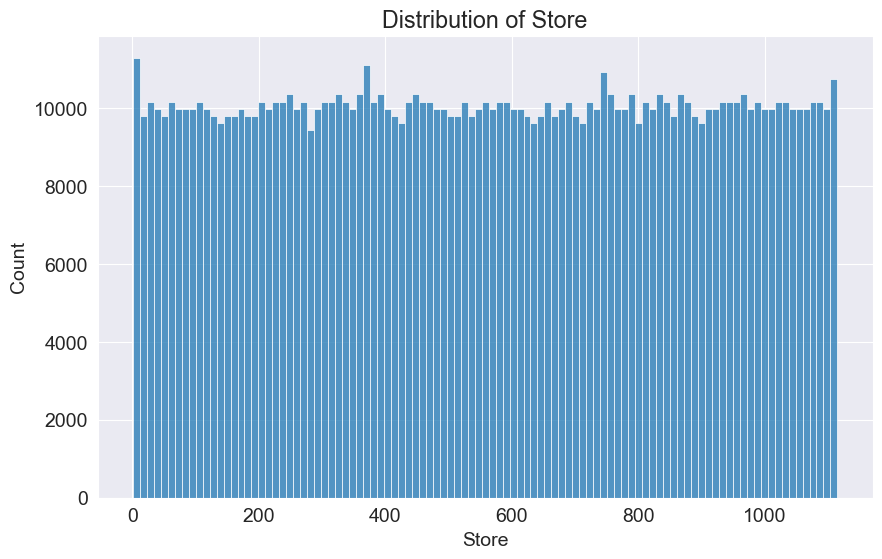

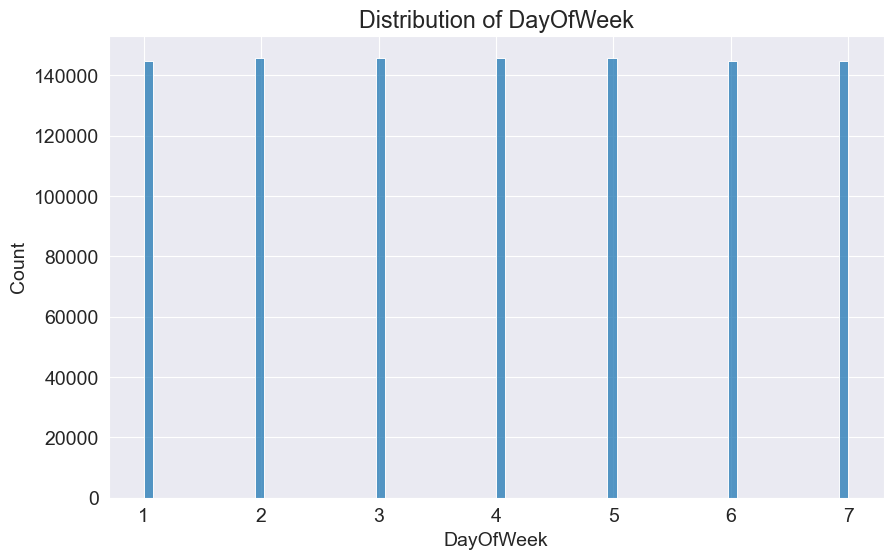

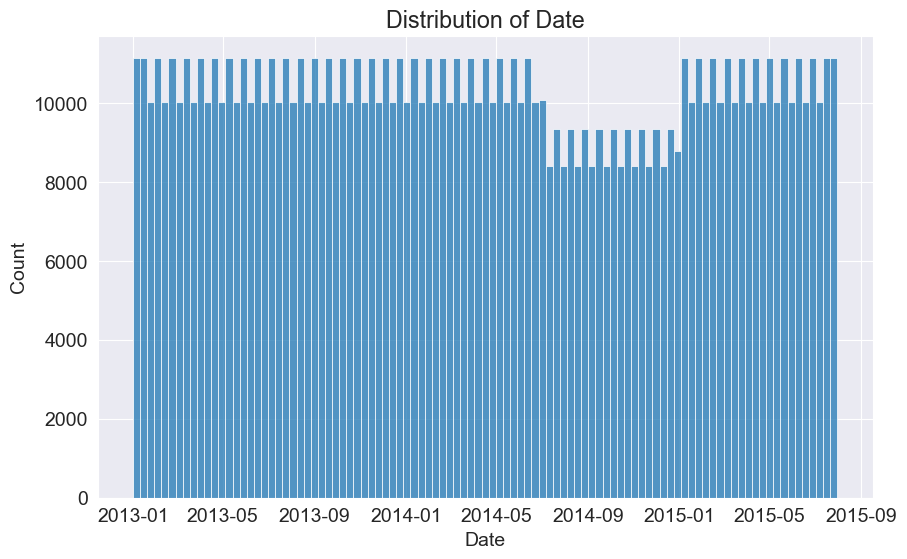

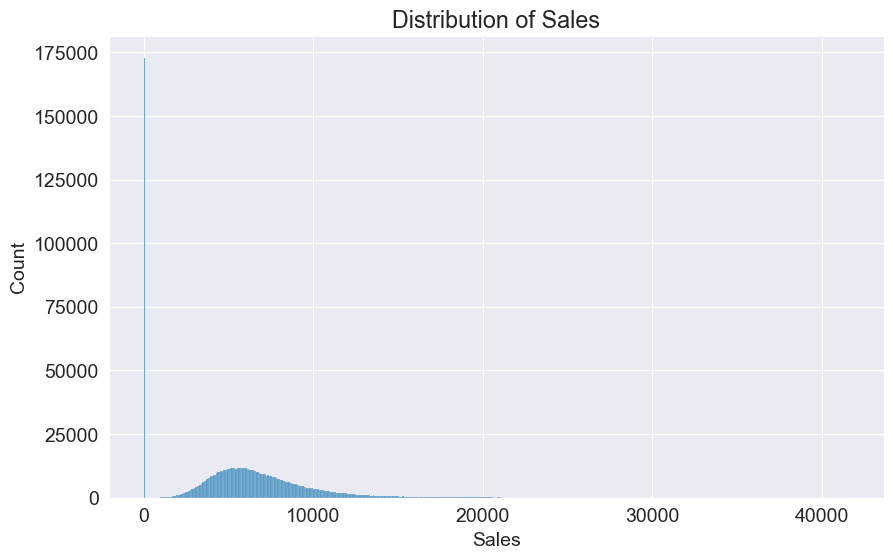

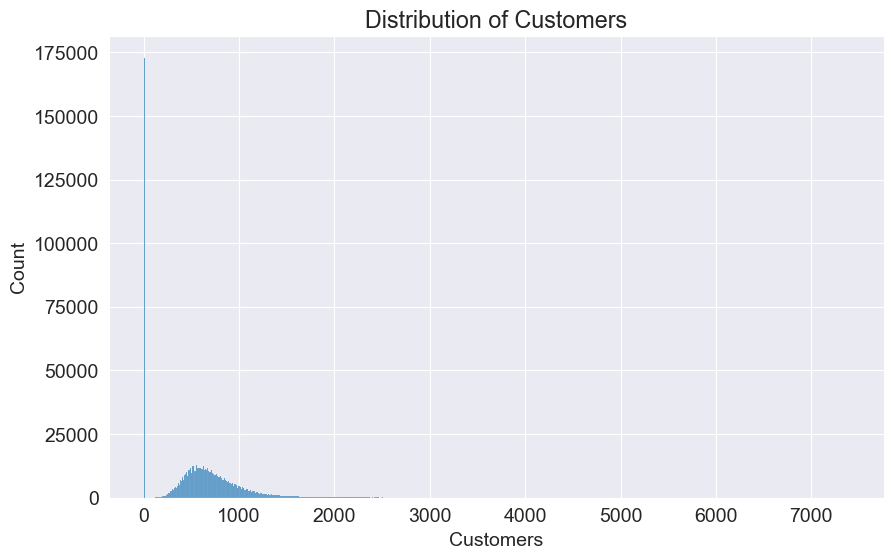

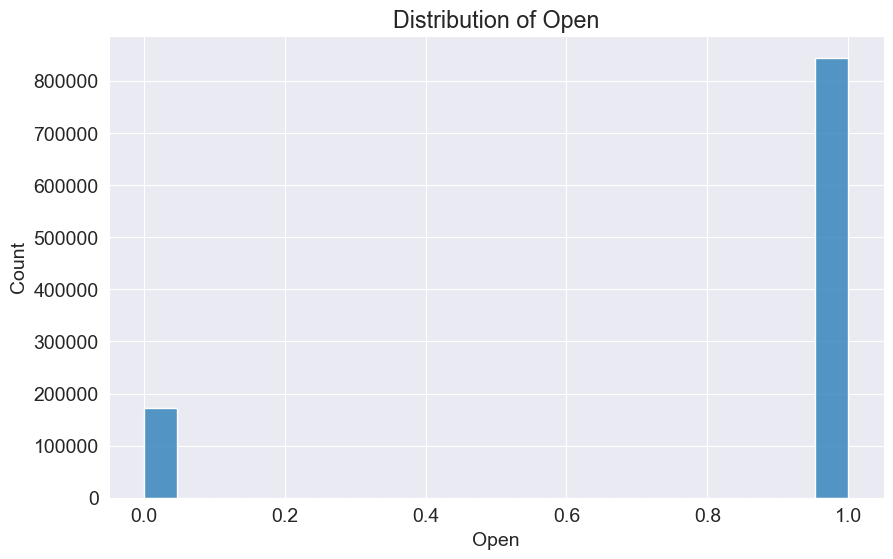

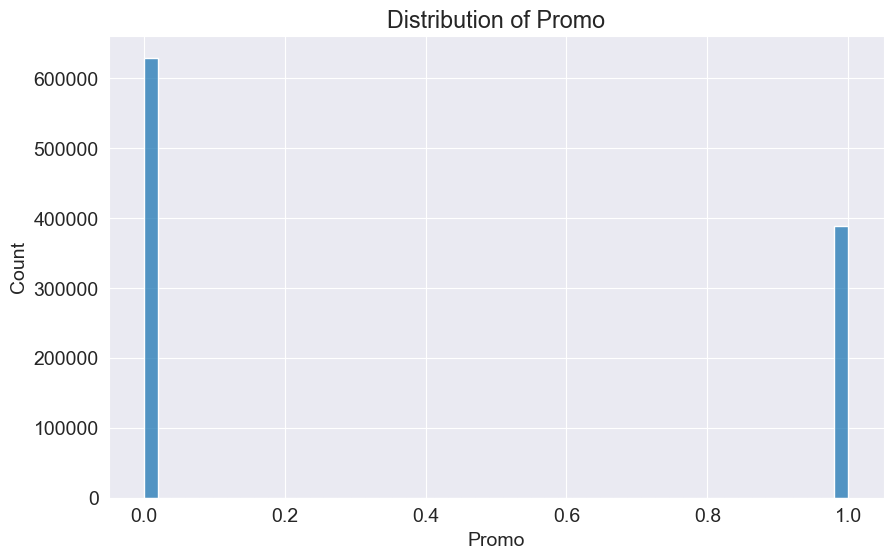

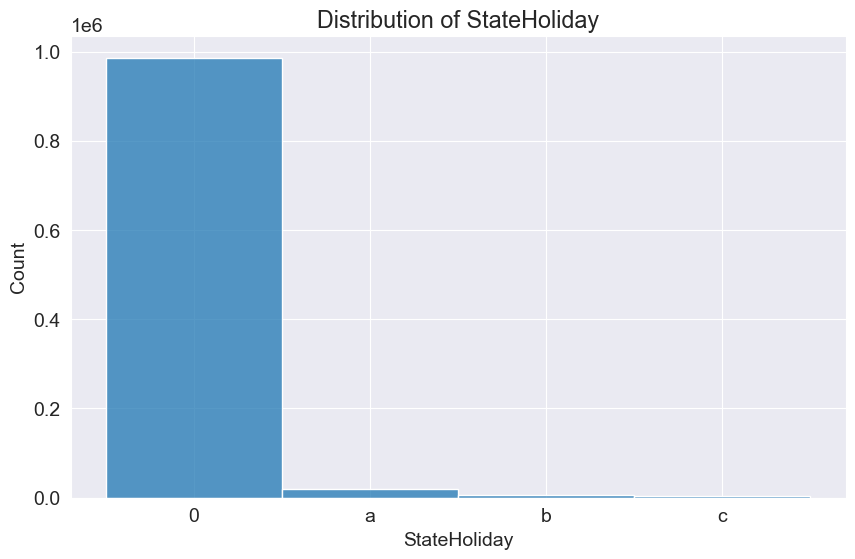

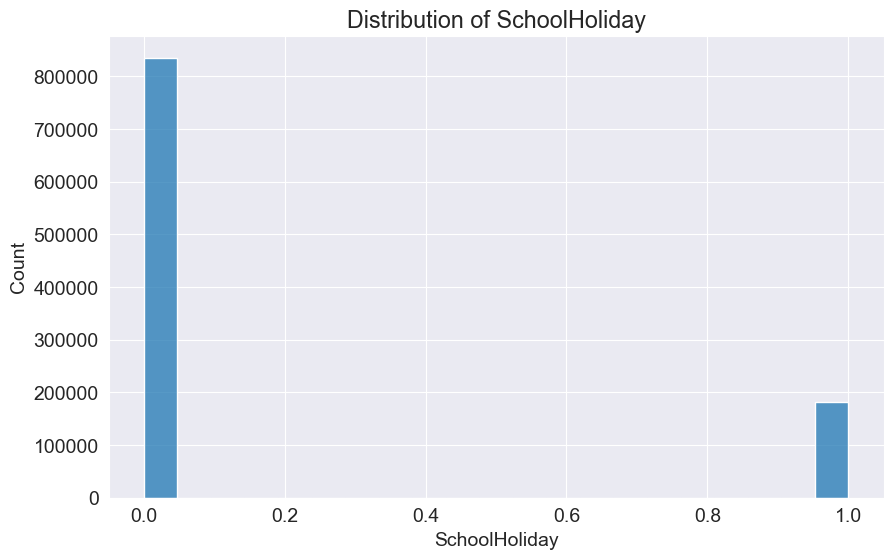

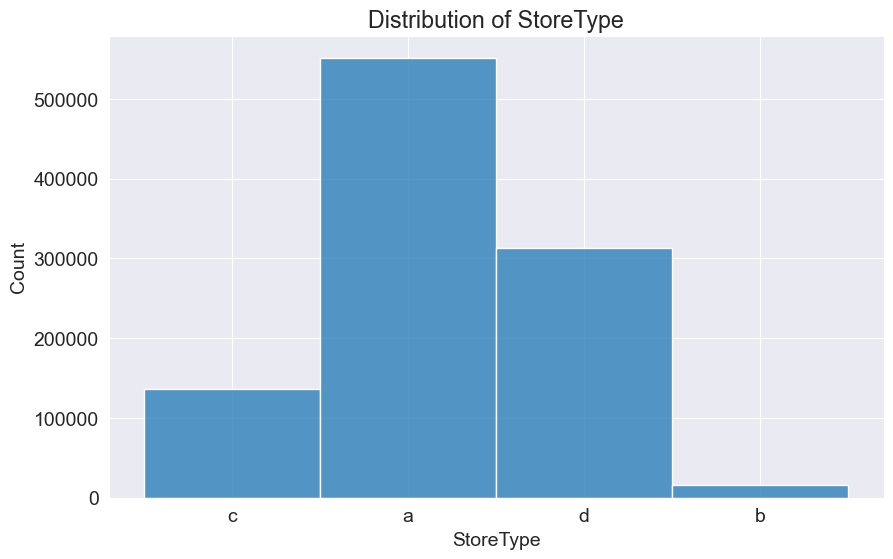

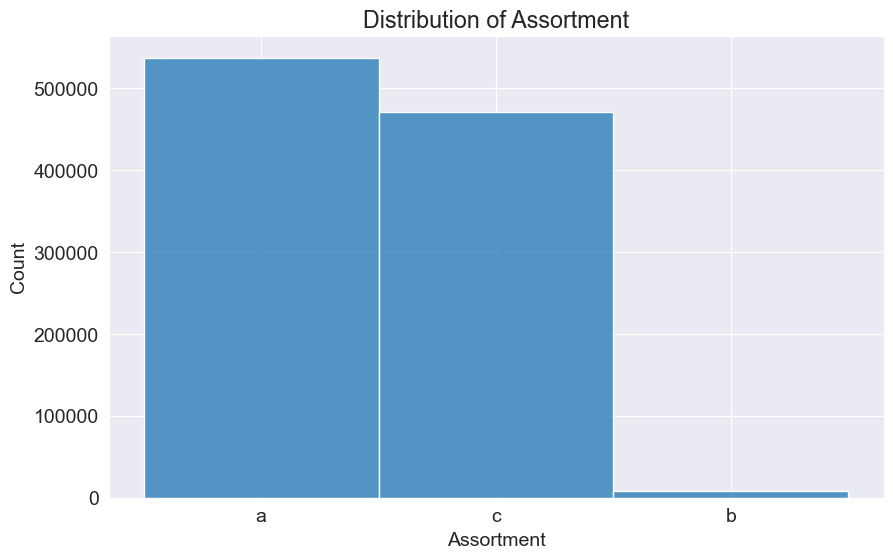

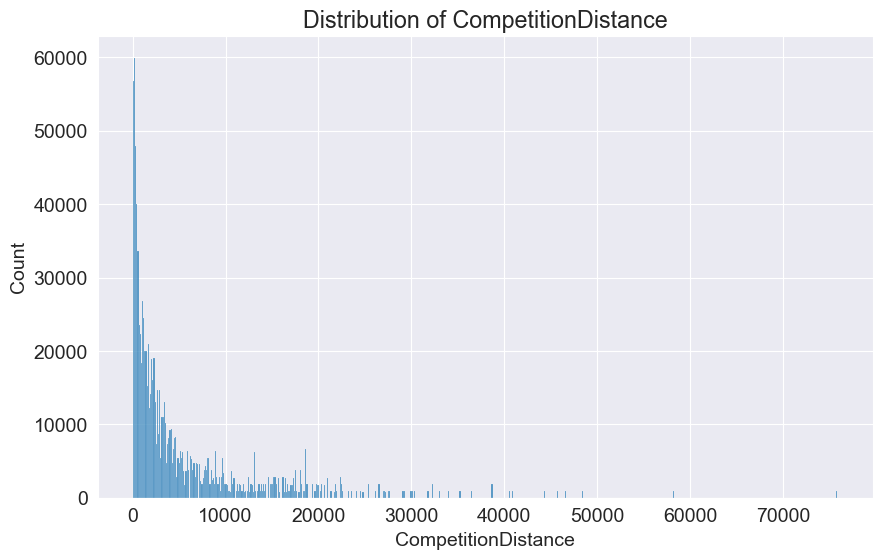

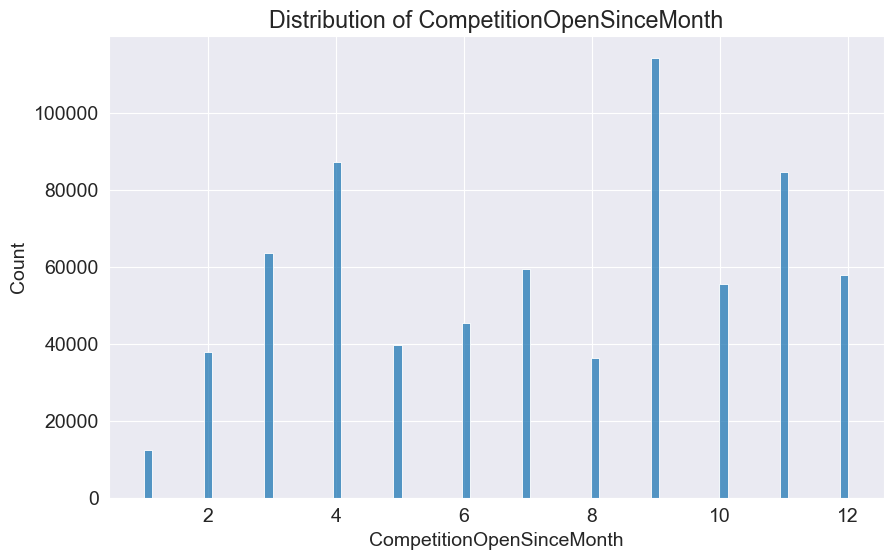

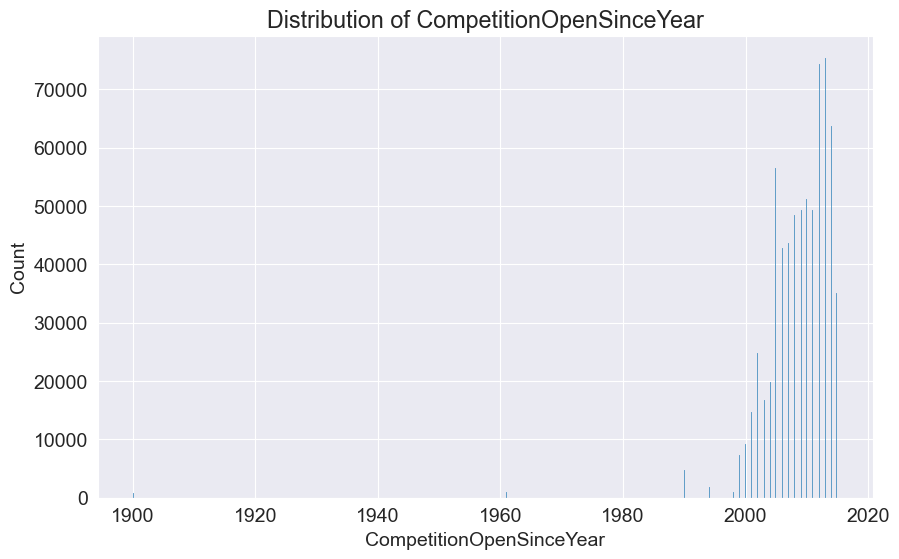

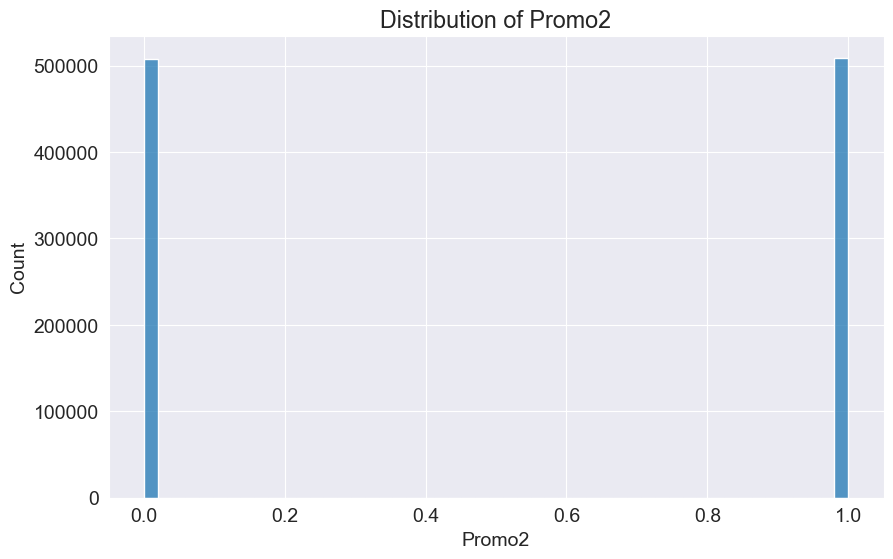

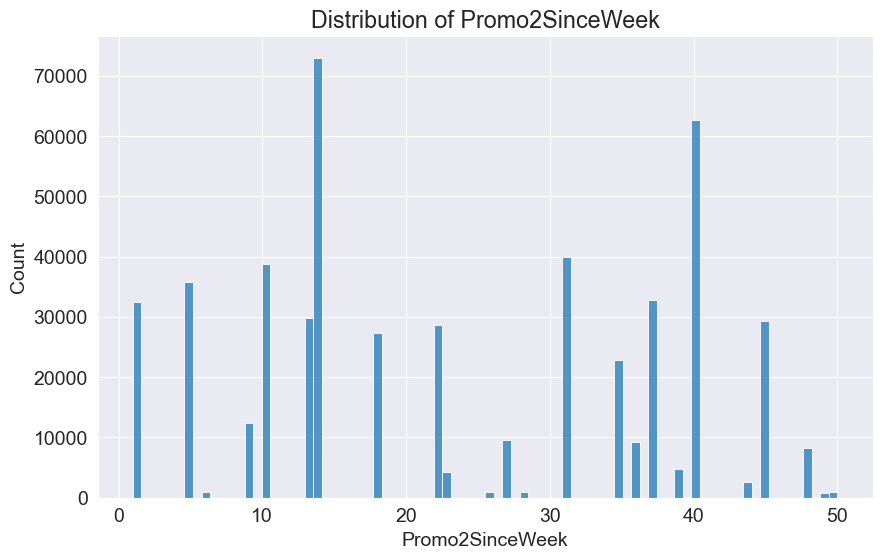

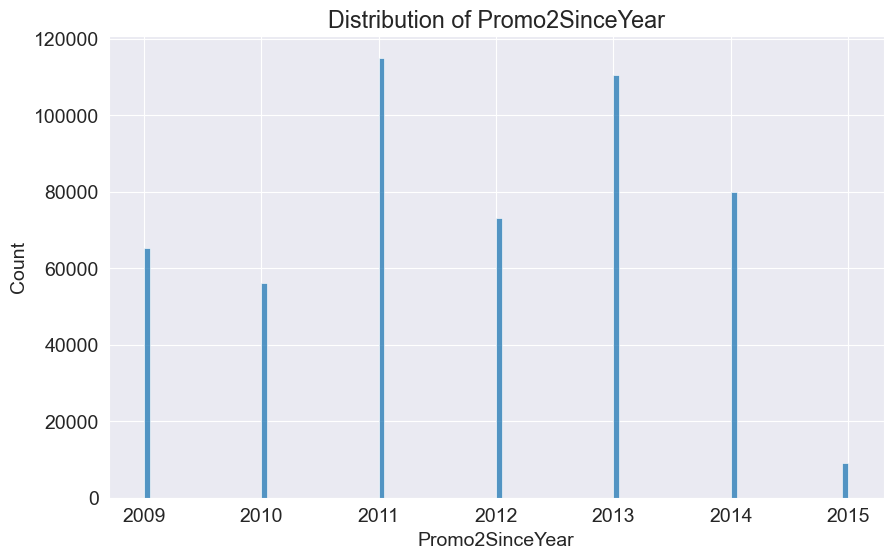

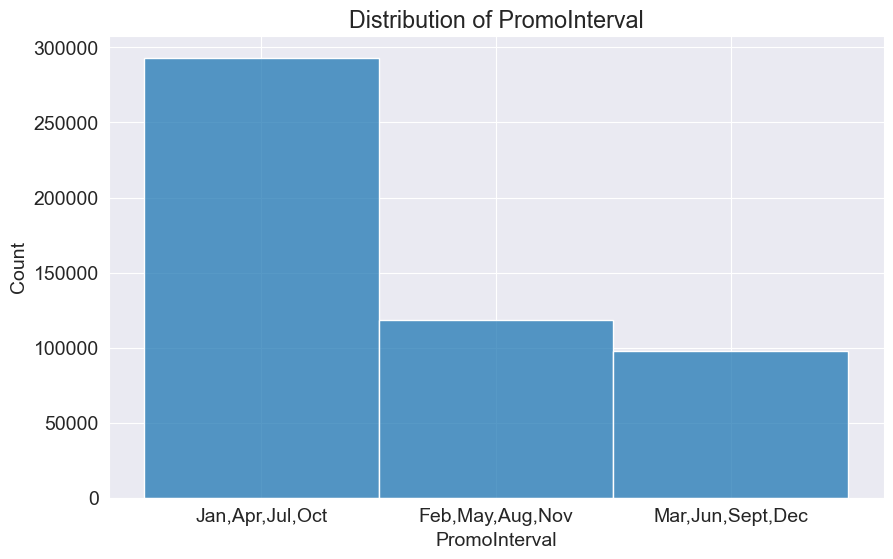

In [20]:
columns =merged_df.columns.tolist()
for col in columns:
    sns.histplot(data=merged_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

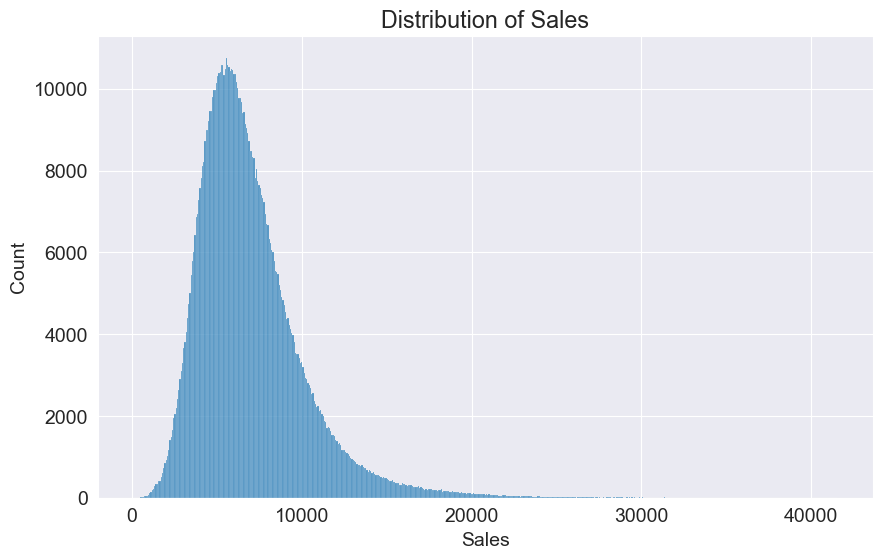

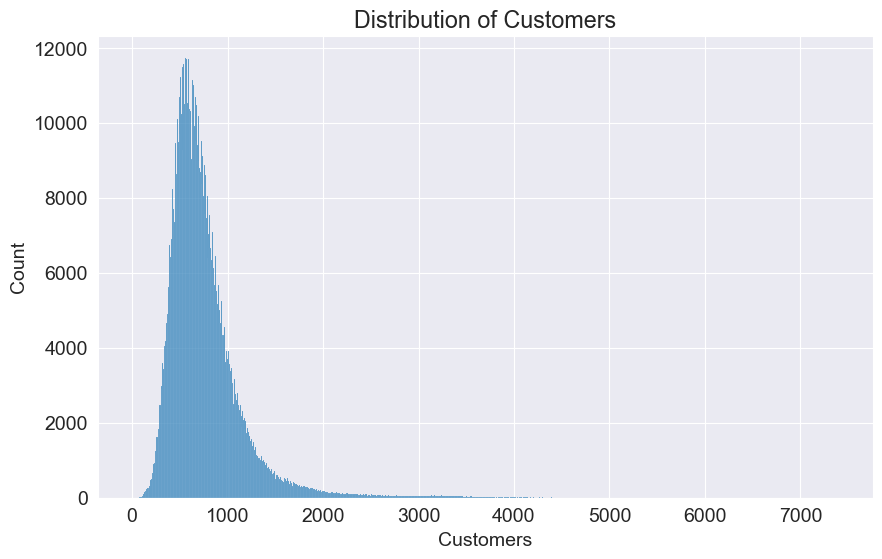

In [21]:
merged_df=merged_df[merged_df["Sales"]>0]
for col in ["Sales","Customers"]:
    sns.histplot(data=merged_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()

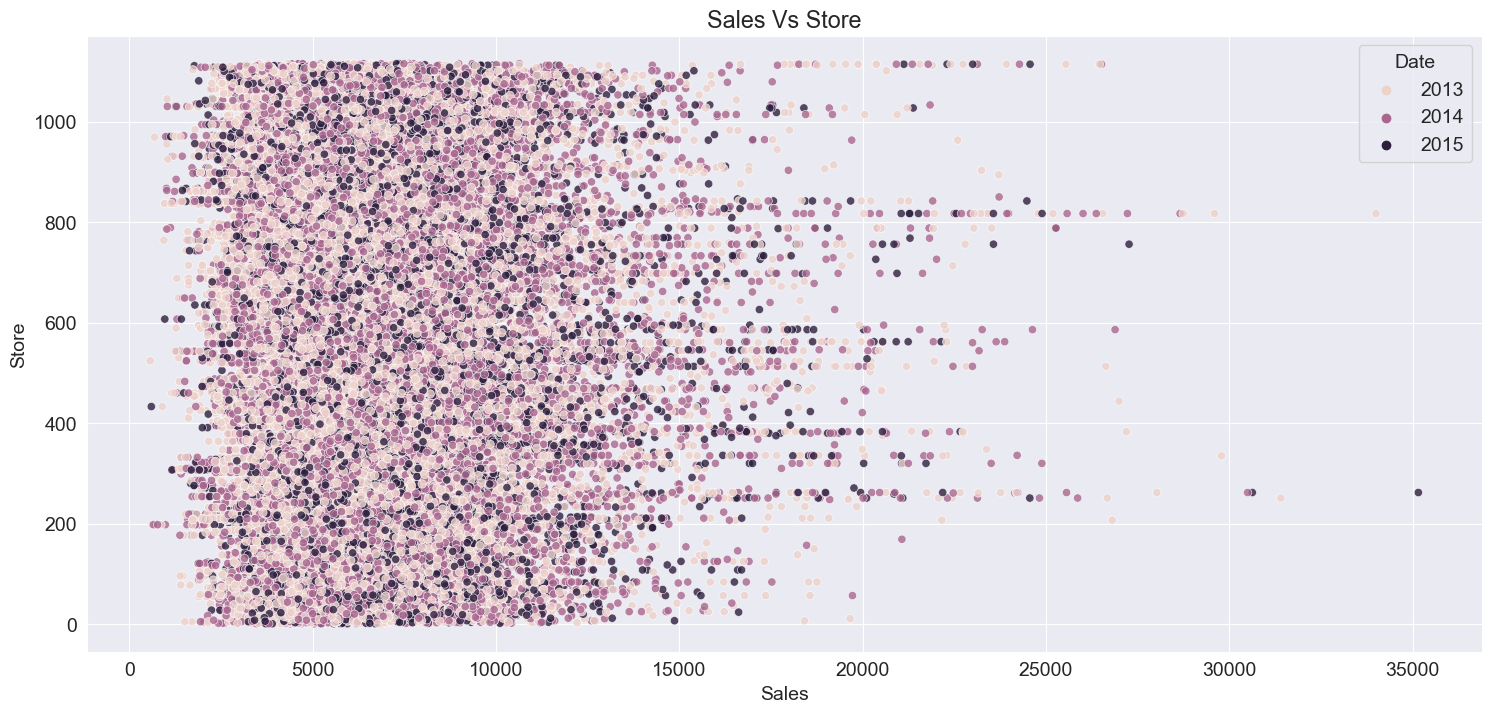

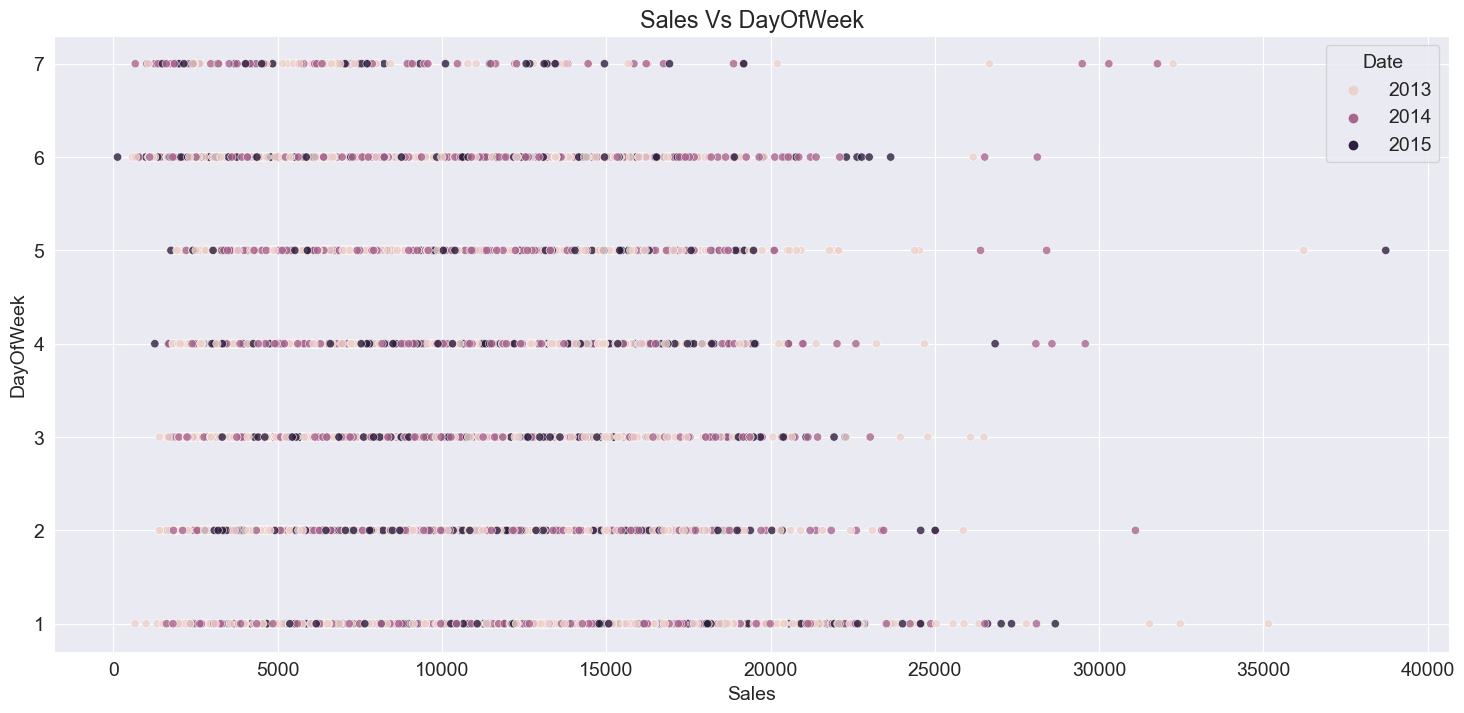

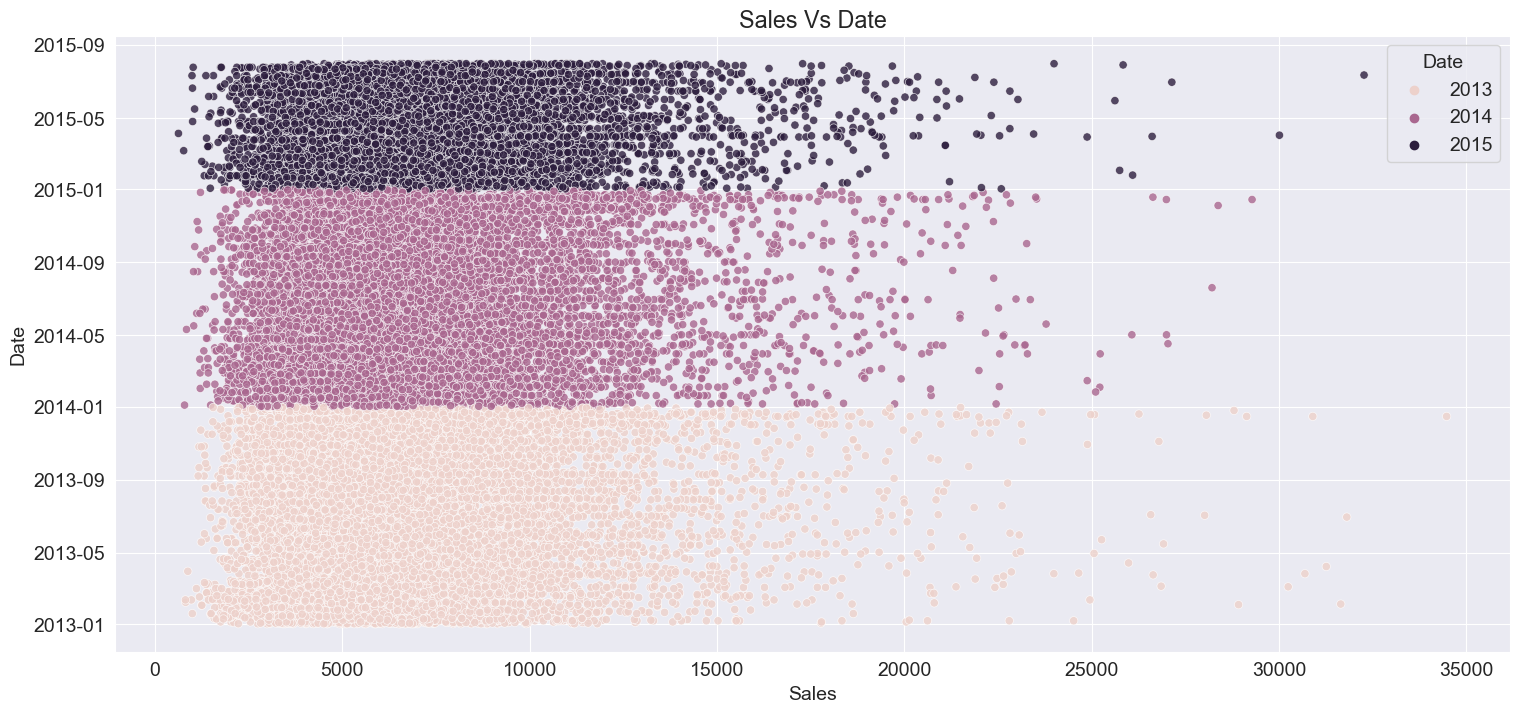

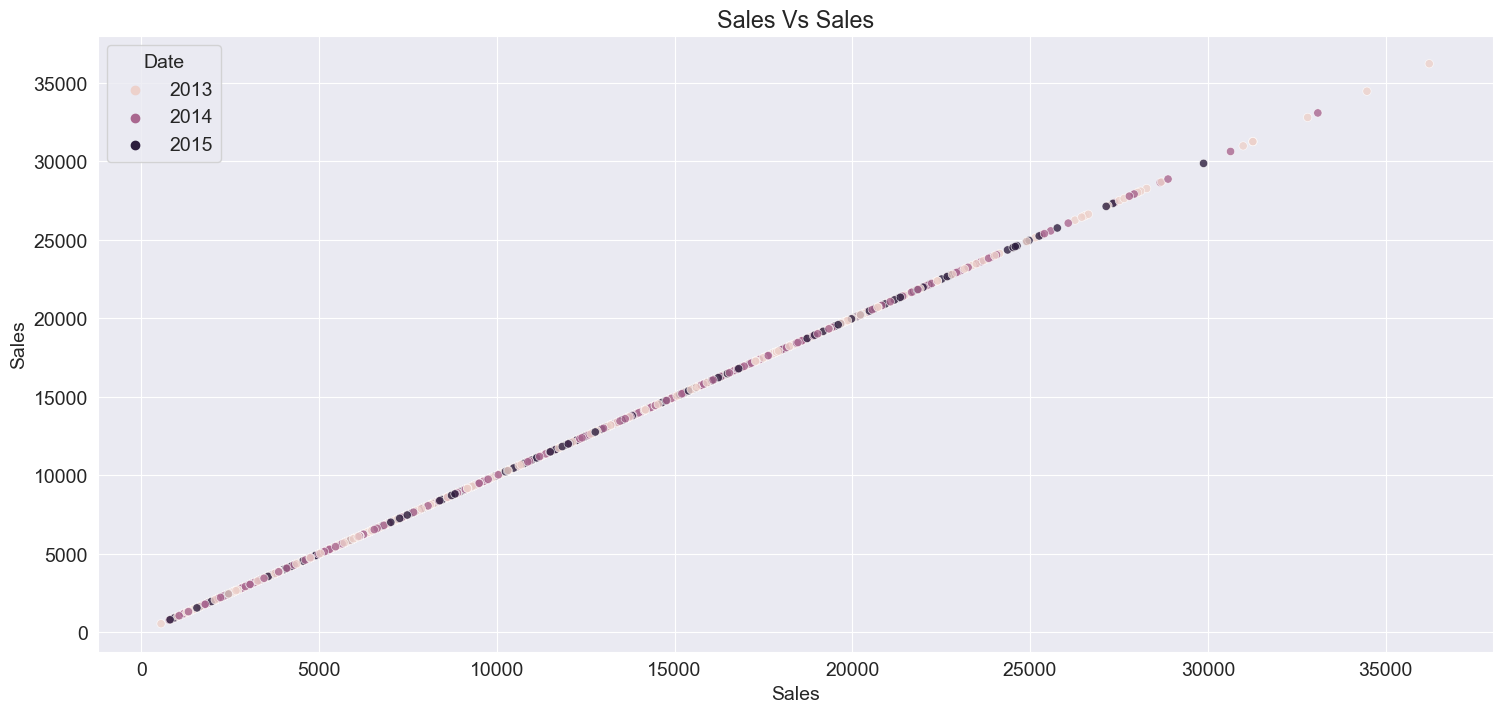

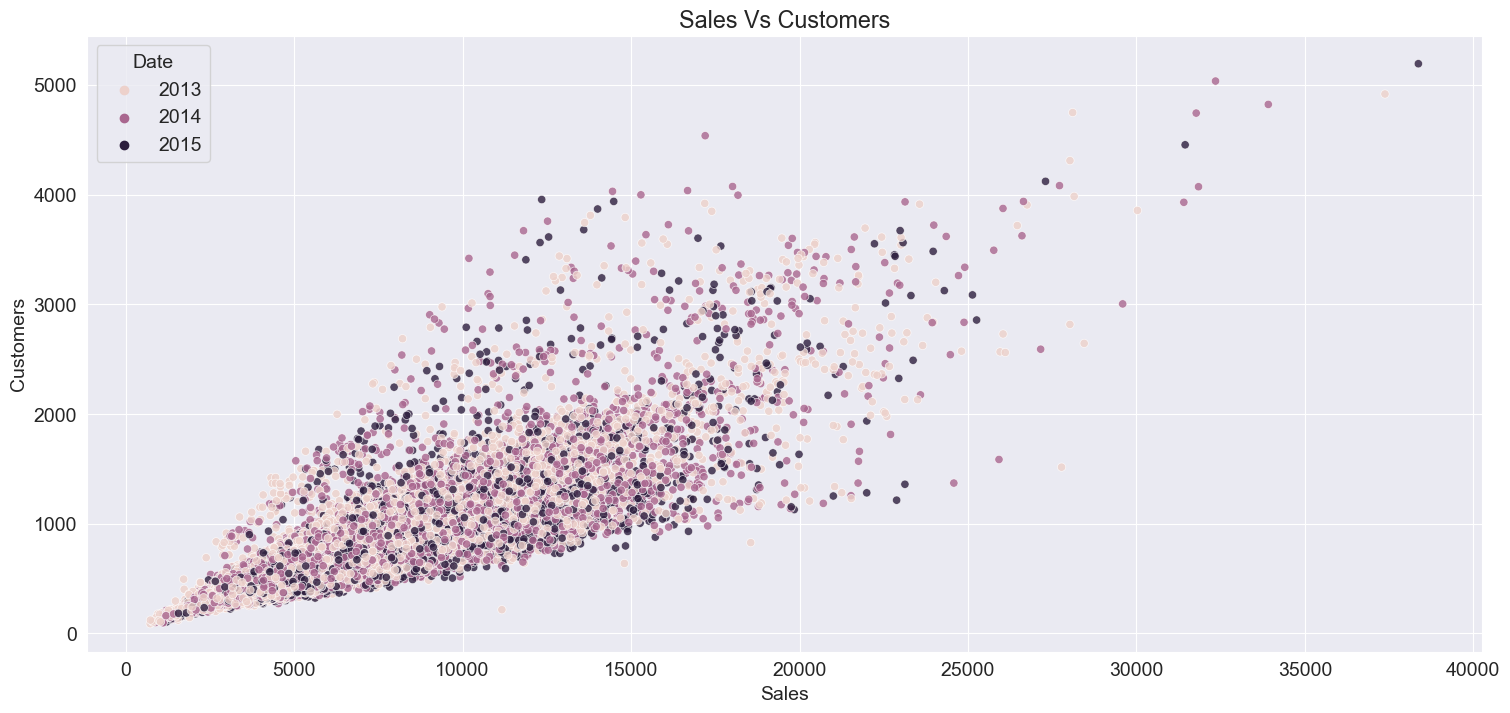

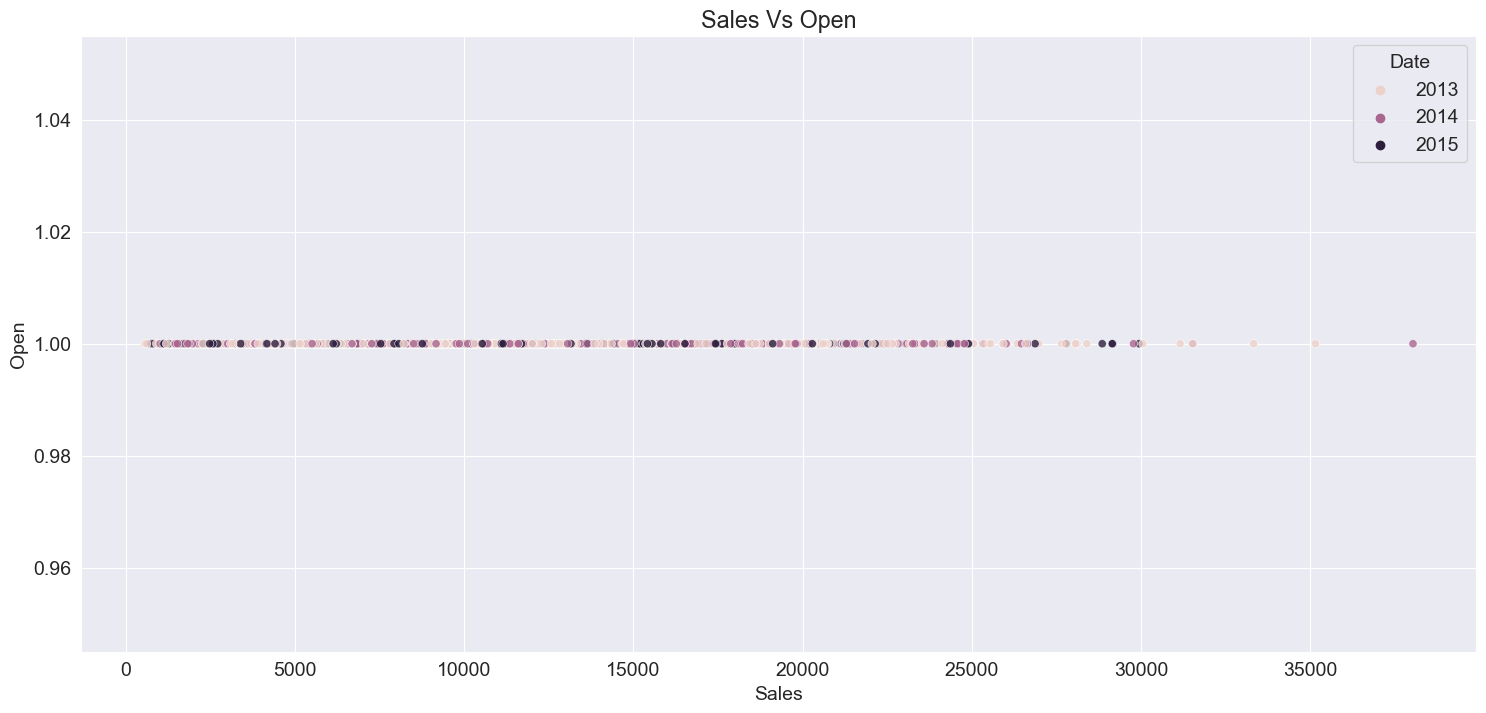

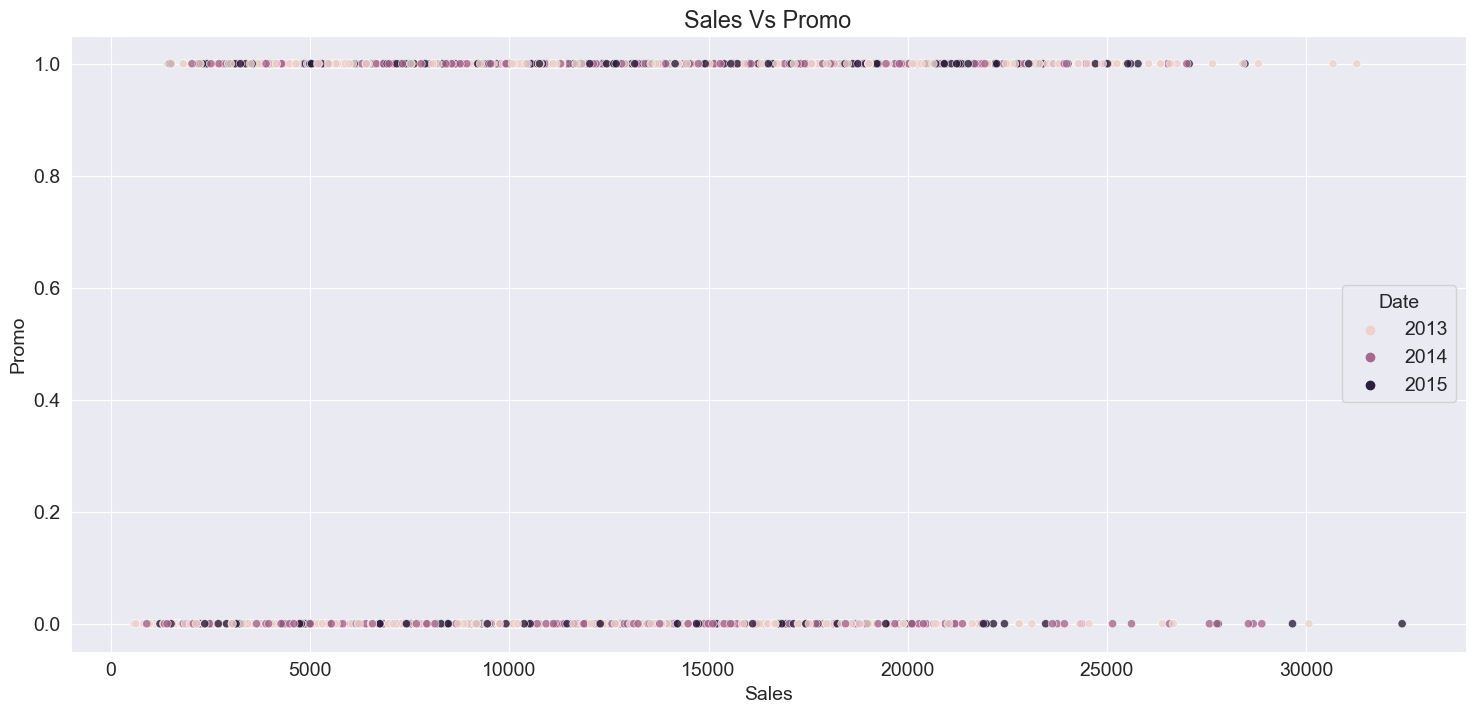

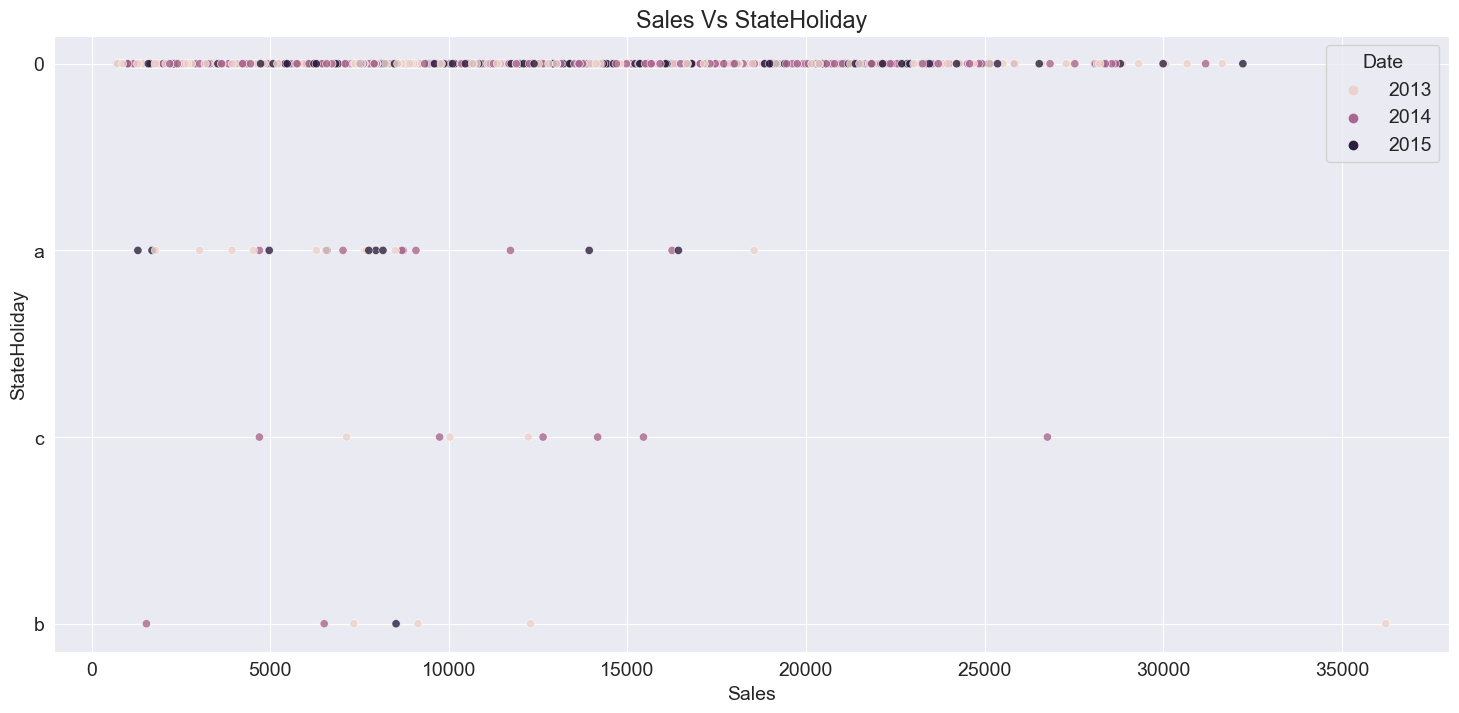

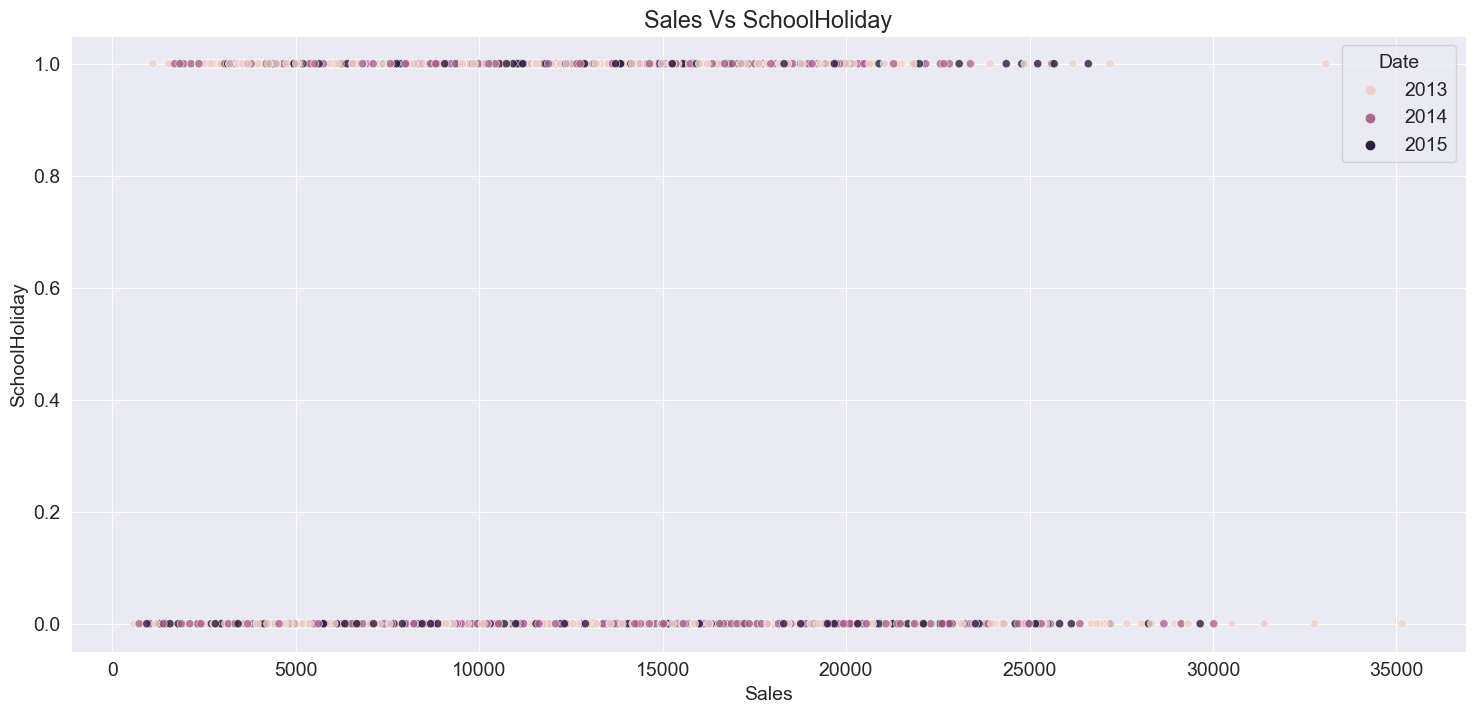

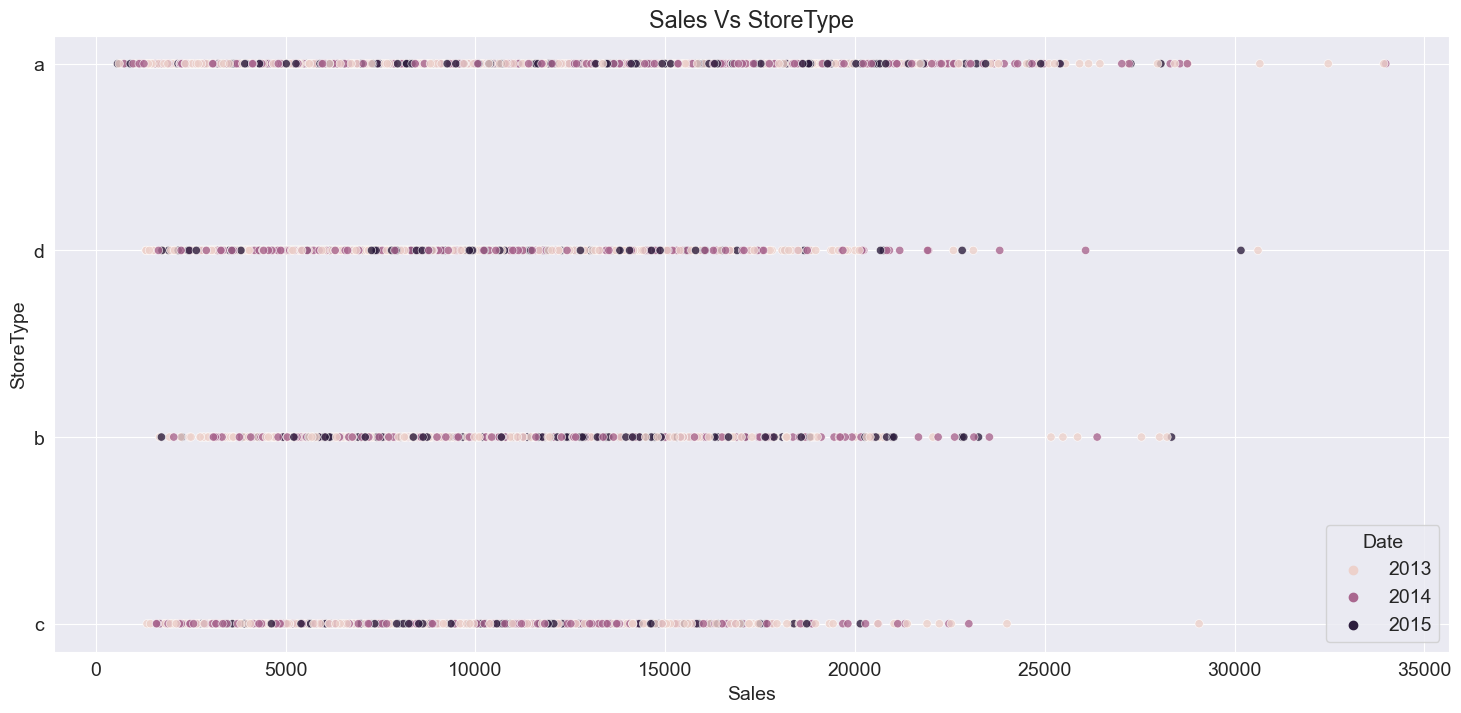

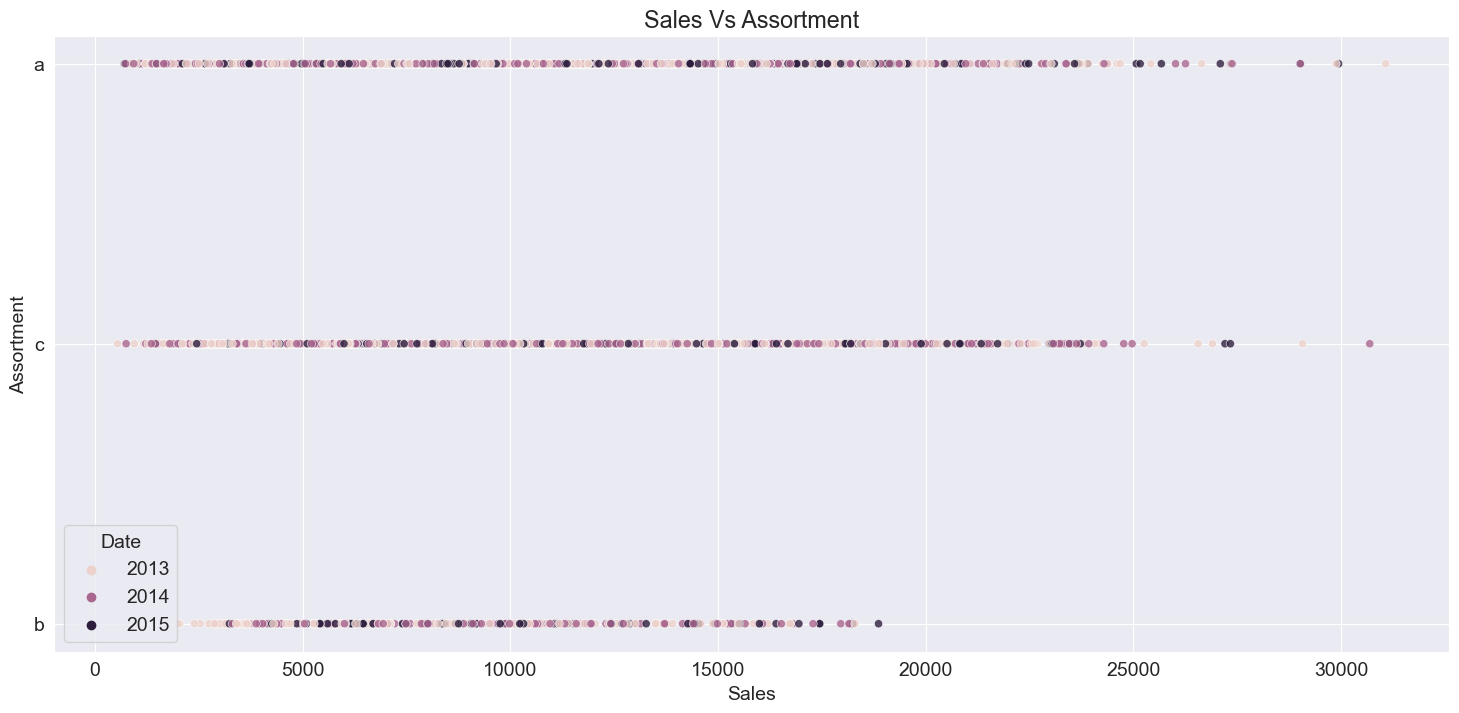

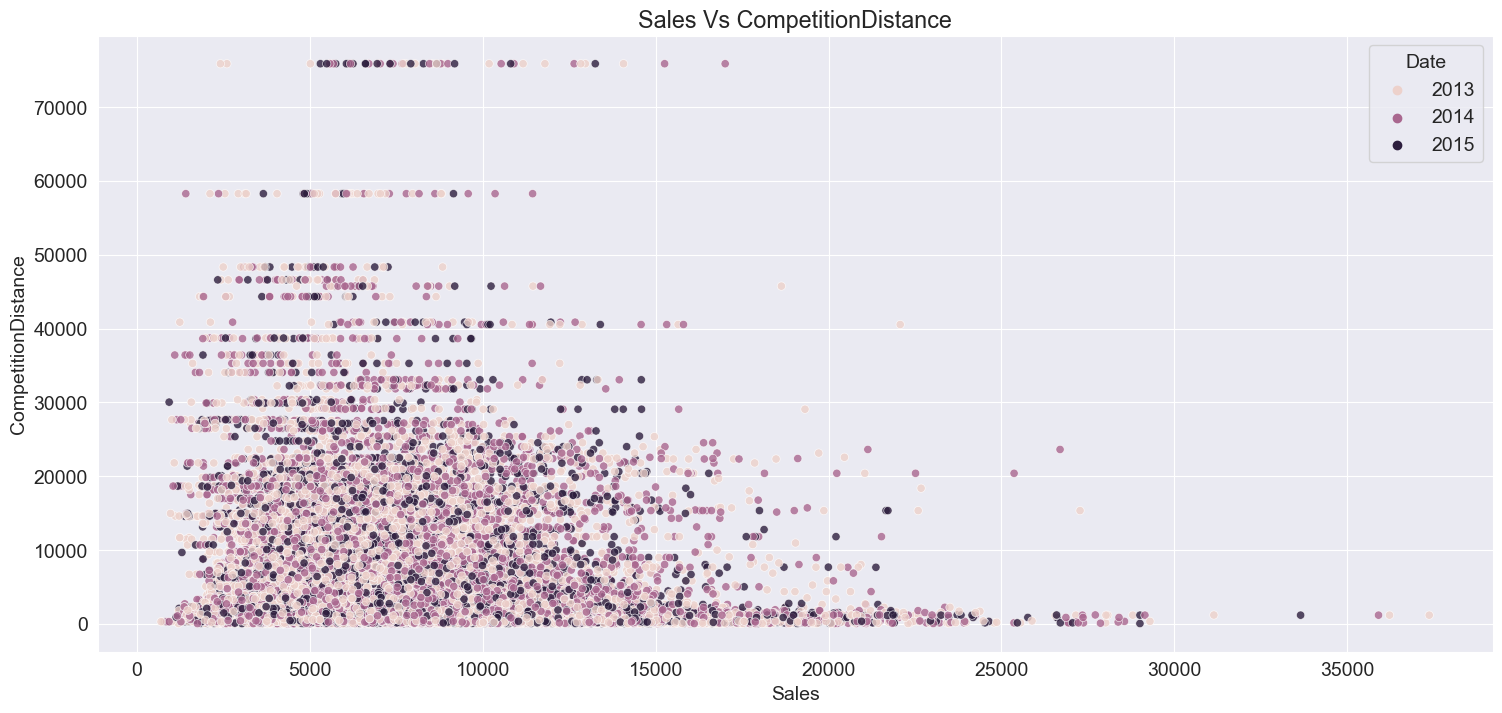

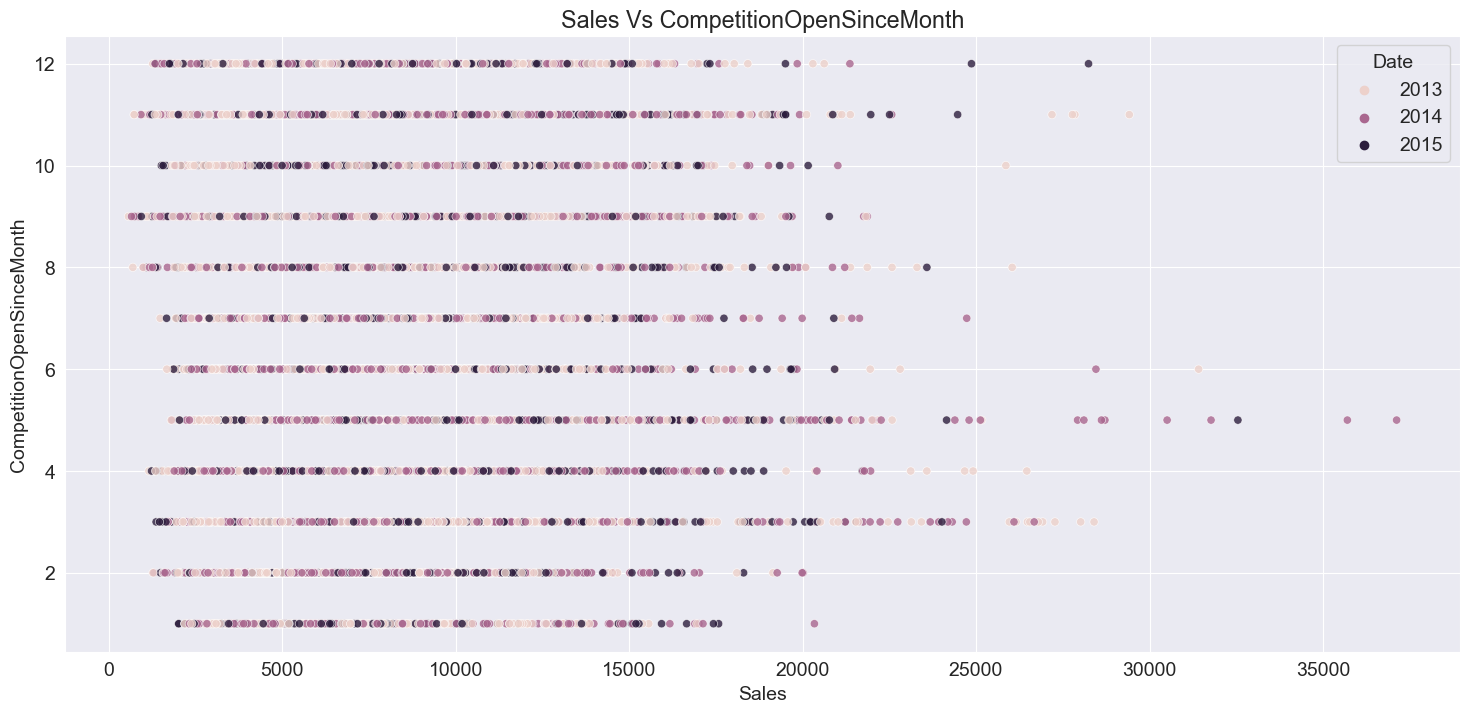

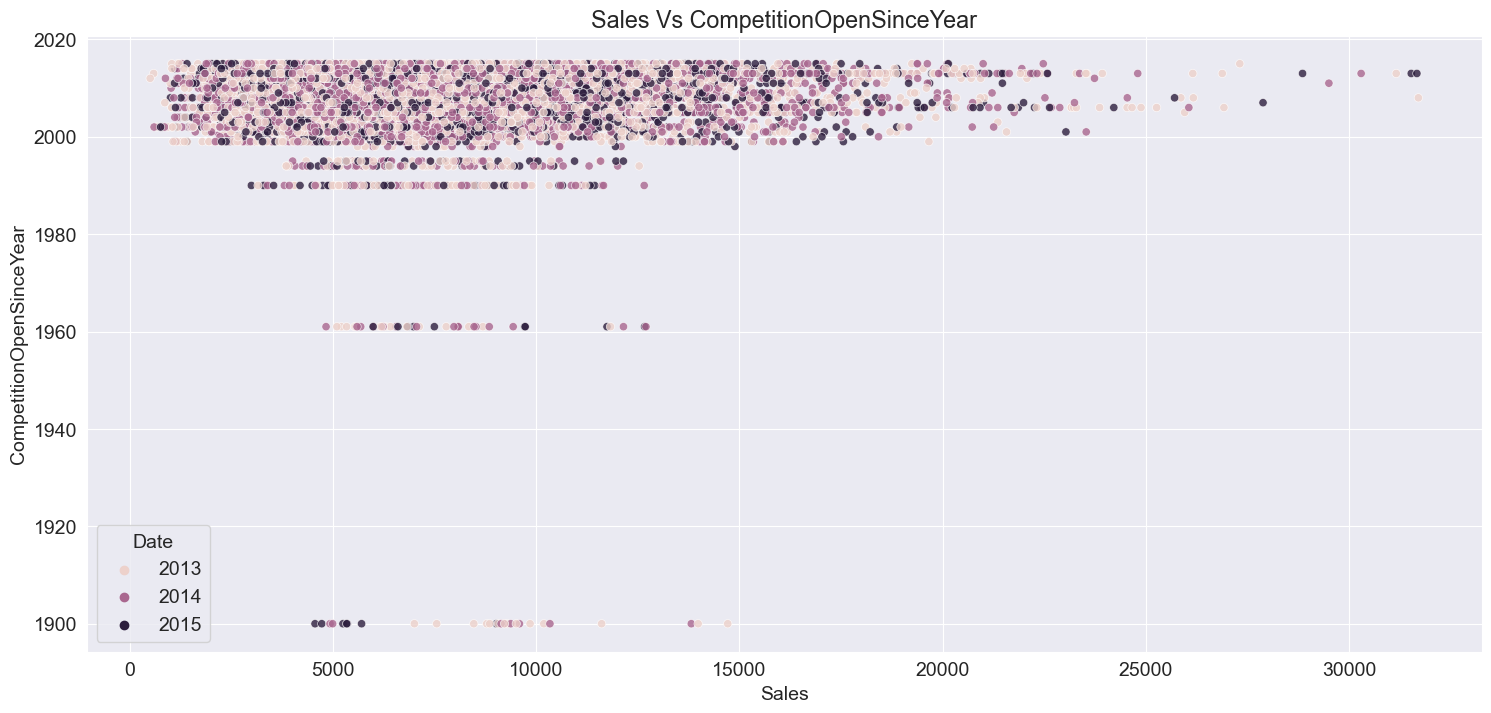

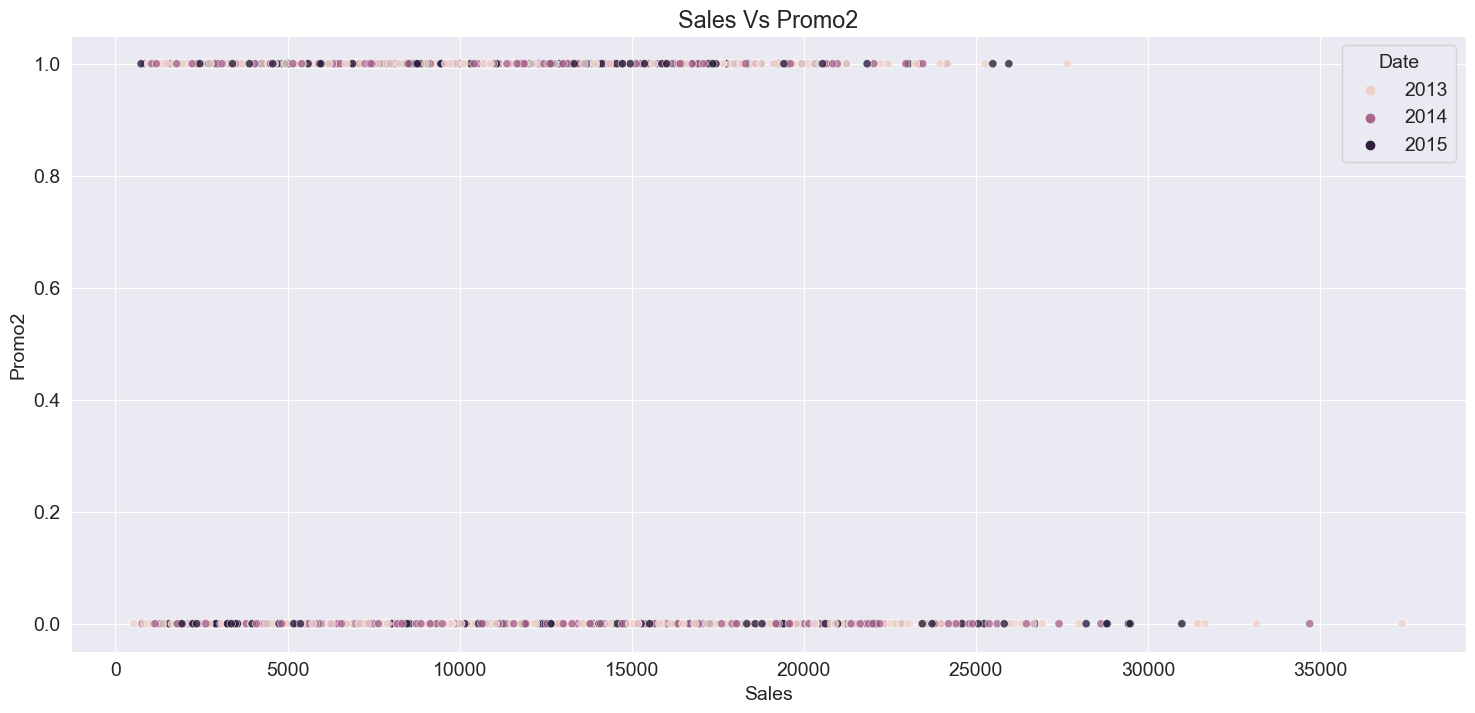

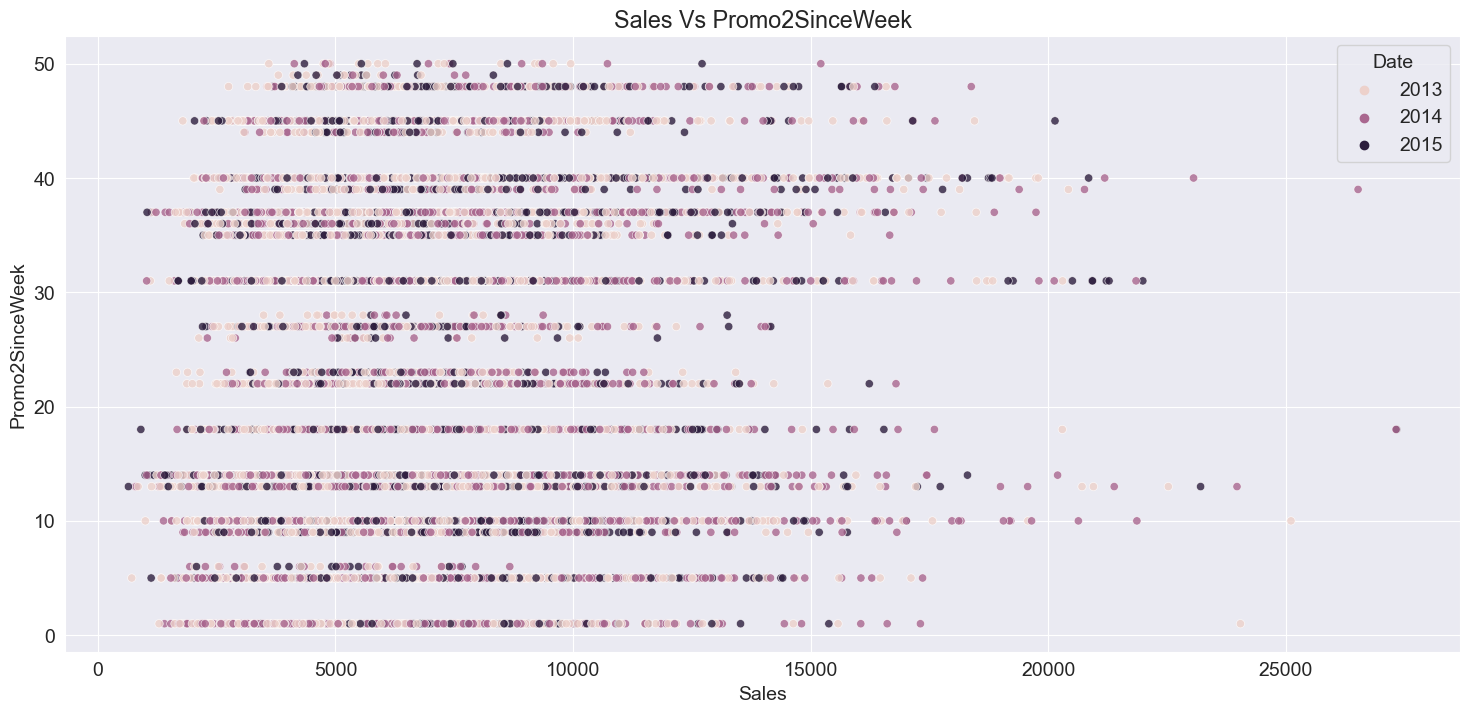

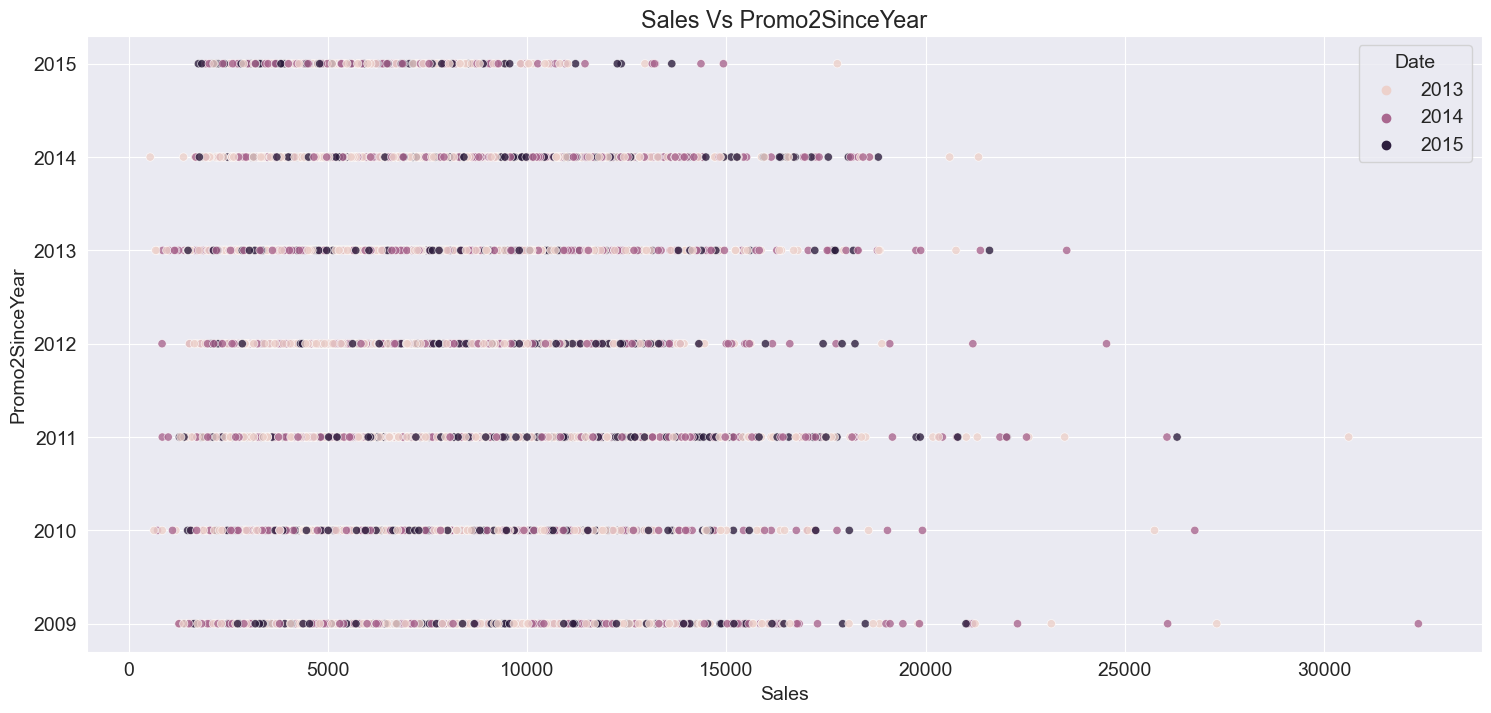

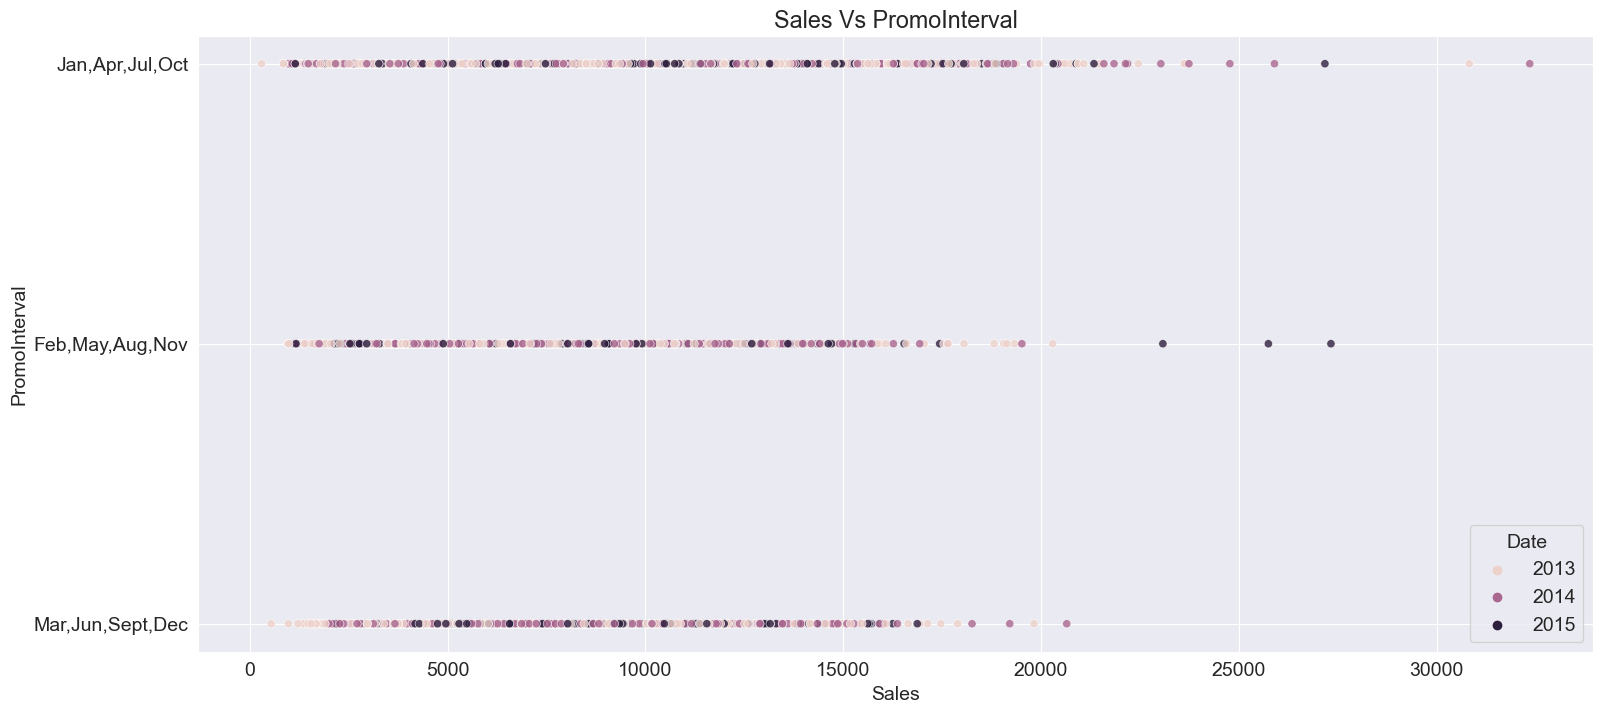

In [22]:
for col in columns:
    plt.figure(figsize=(18,8))
    temp_df = merged_df.sample(40000)
    sns.scatterplot(x=temp_df.Sales, y=temp_df[col], hue=temp_df.Date.dt.year, alpha=0.8)
    plt.title("Sales Vs"+" "+col)
    plt.show()

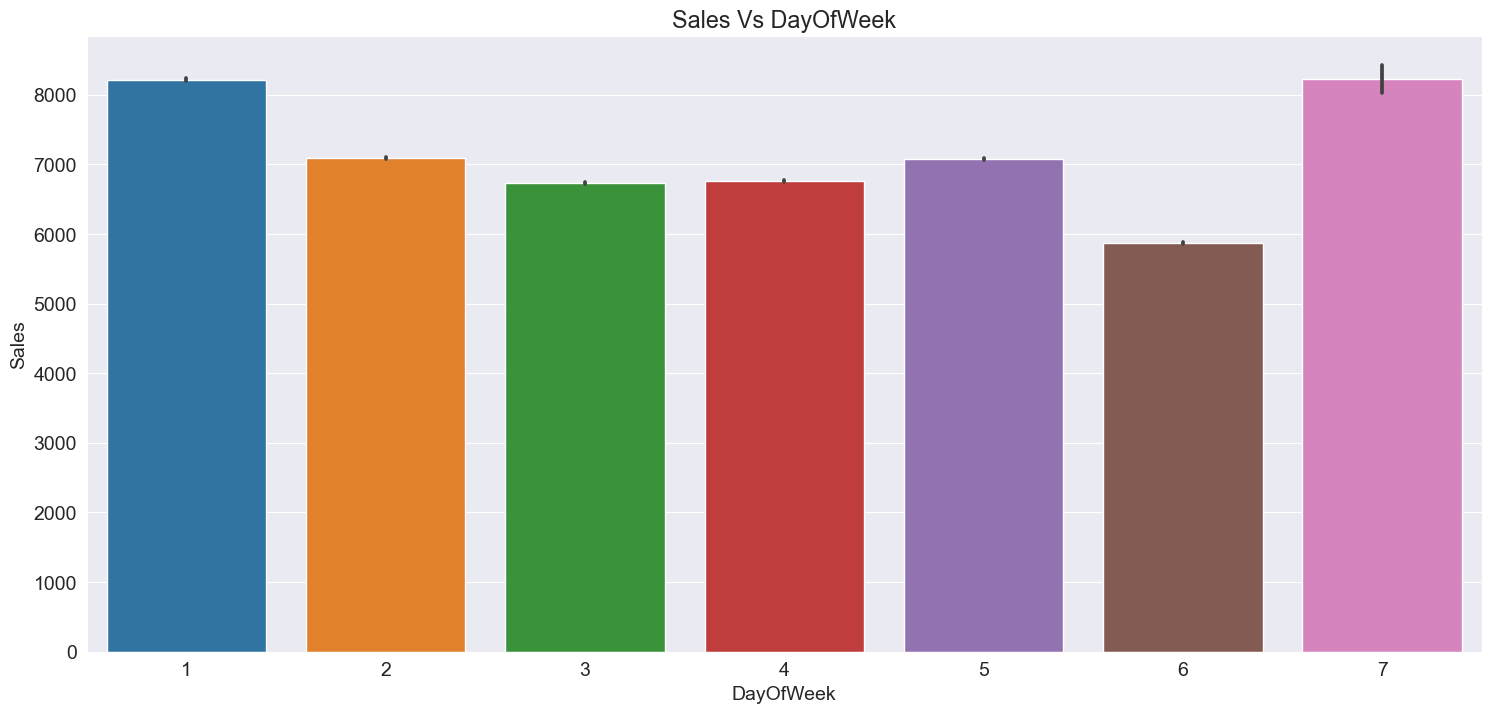

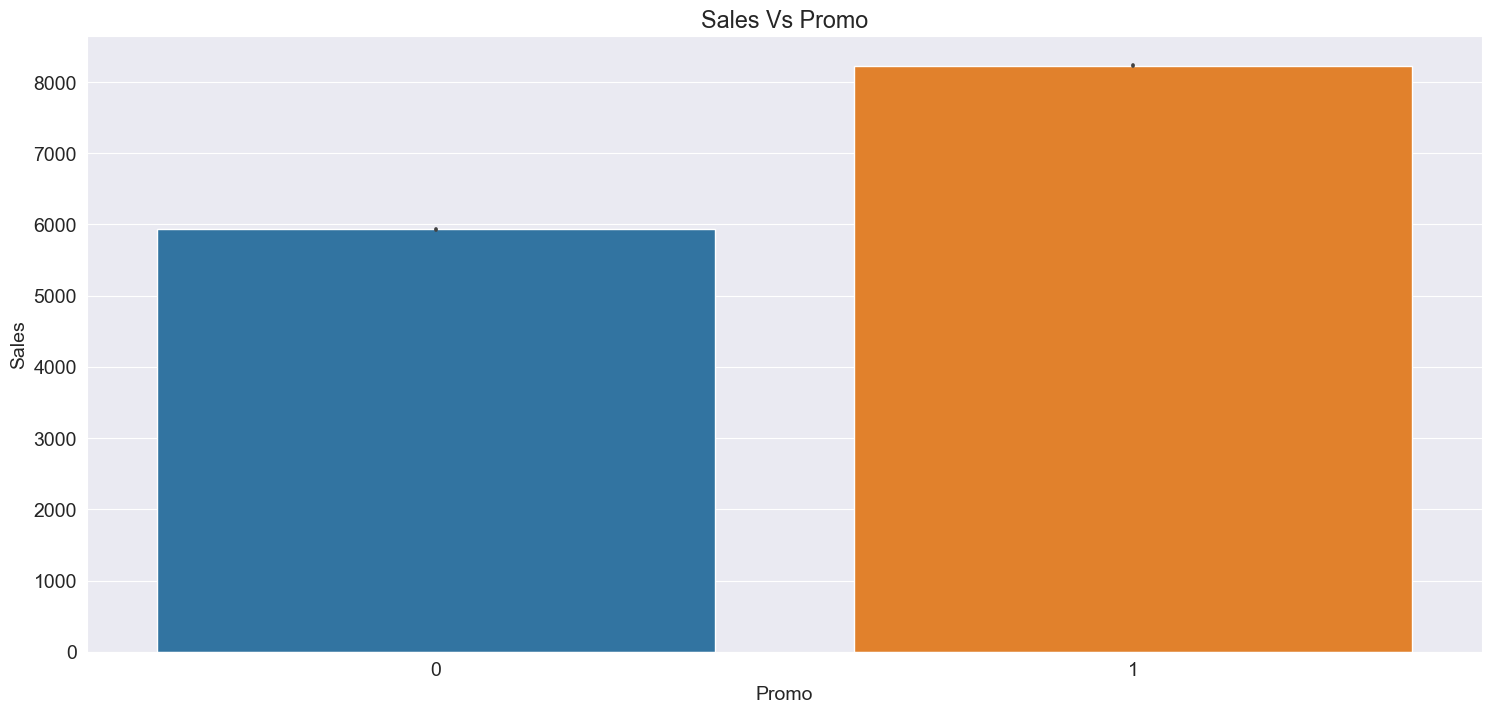

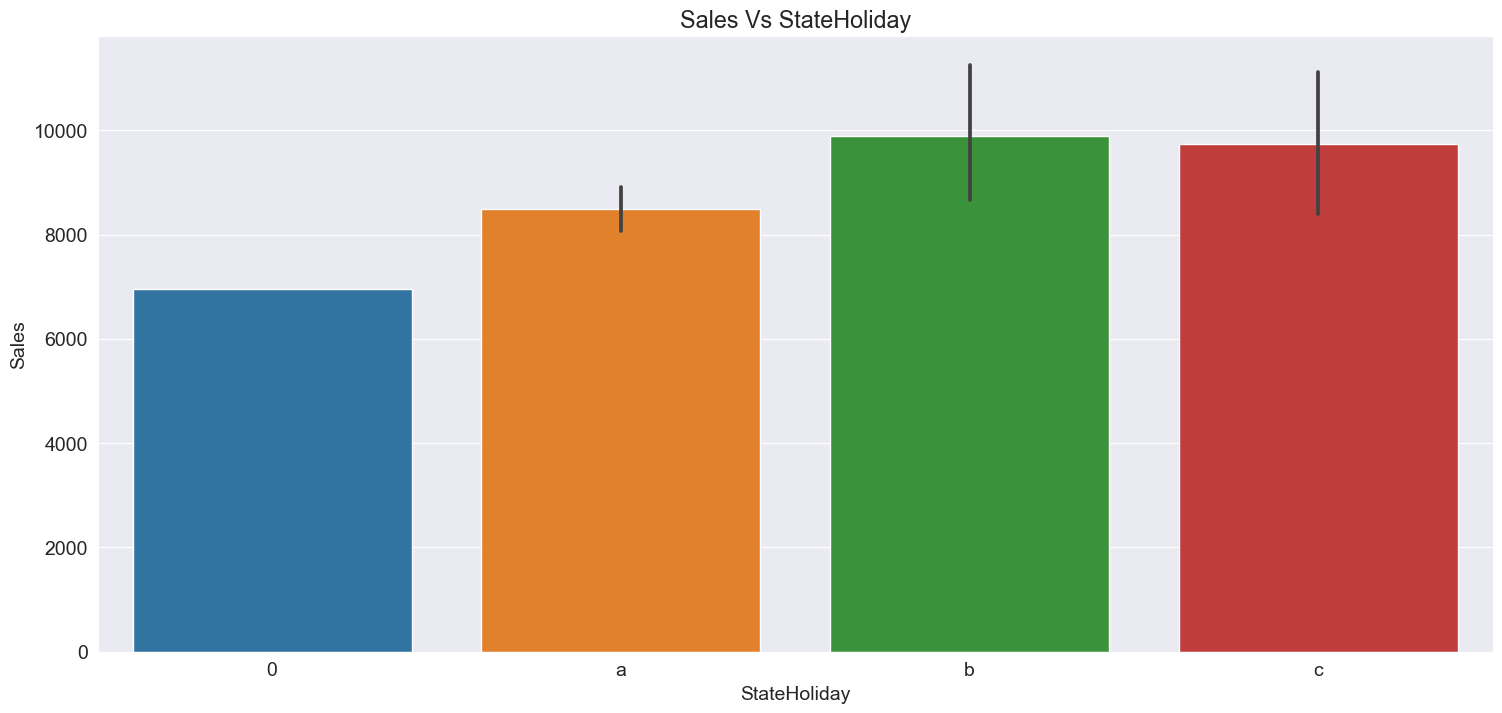

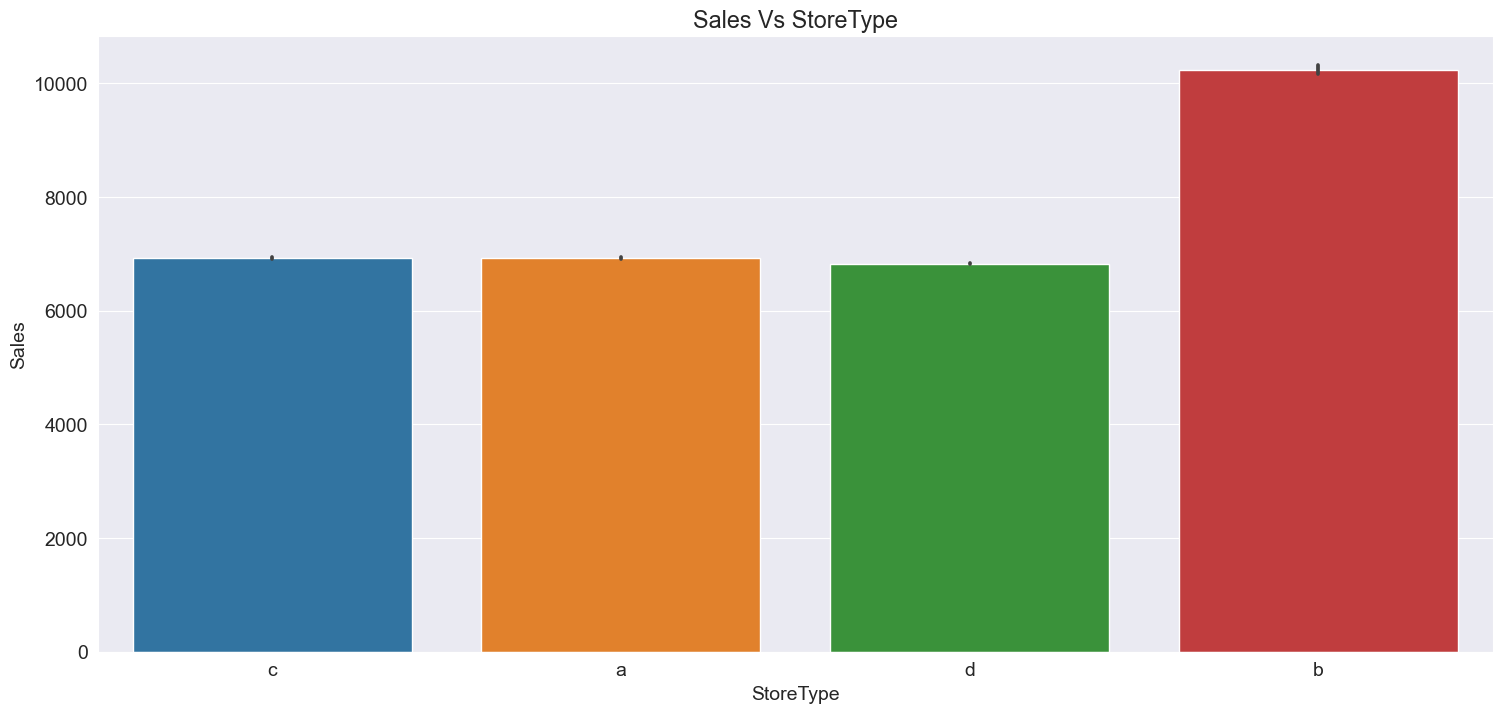

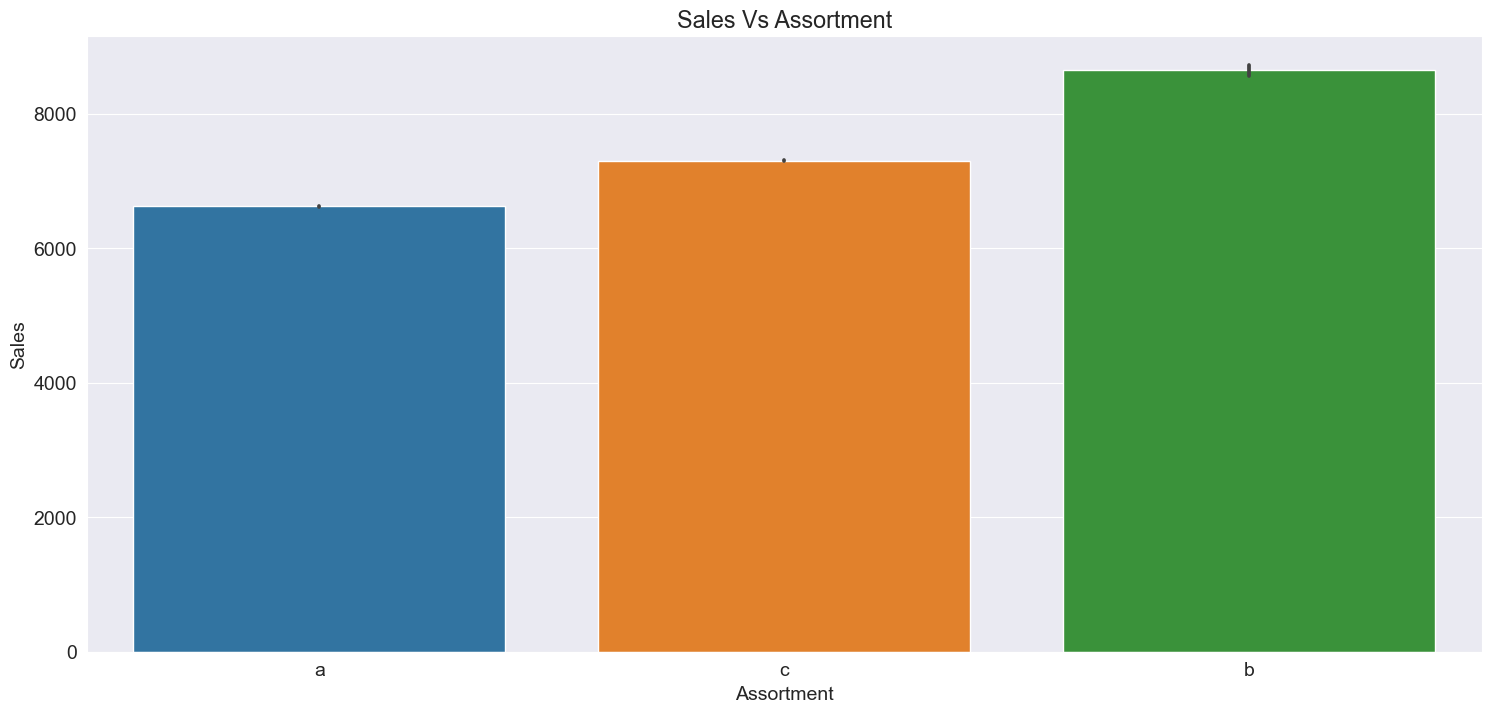

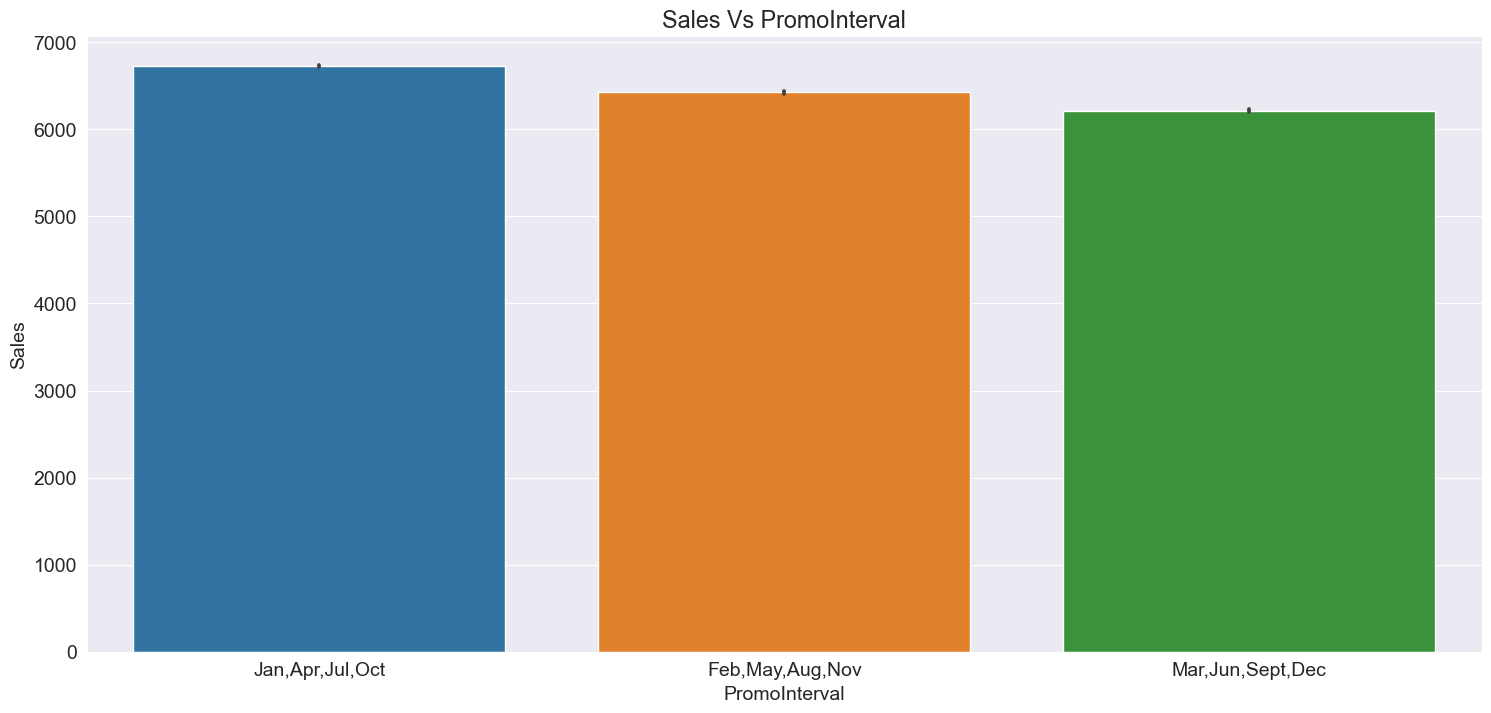

In [23]:
for col in ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment',"PromoInterval"]:
    plt.figure(figsize=(18,8))
    sns.barplot(data=merged_df, x=col, y='Sales')
    plt.title("Sales Vs"+" "+col)
    plt.show()
    

In [24]:
merged_df.corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823552
Promo                        0.368199
Promo2SinceWeek              0.095212
SchoolHoliday                0.038635
CompetitionOpenSinceYear     0.016102
Store                        0.007723
Promo2SinceYear             -0.034595
CompetitionDistance         -0.036453
CompetitionOpenSinceMonth   -0.043472
Promo2                      -0.127556
DayOfWeek                   -0.178753
Open                              NaN
Name: Sales, dtype: float64

### Feature Engineering

#### Date

In [25]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year
merged_df['WeekOfYear'] = merged_df.Date.dt.isocalendar().week

C:\Users\91808\AppData\Local\Temp\ipykernel_8084\3204596537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Day'] = merged_df.Date.dt.day
C:\Users\91808\AppData\Local\Temp\ipykernel_8084\3204596537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Month'] = merged_df.Date.dt.month
C:\Users\91808\AppData\Local\Temp\ipykernel_8084\3204596537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [26]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year
merged_test_df['WeekOfYear'] = merged_test_df.Date.dt.isocalendar().week

<AxesSubplot:xlabel='Year', ylabel='Sales'>

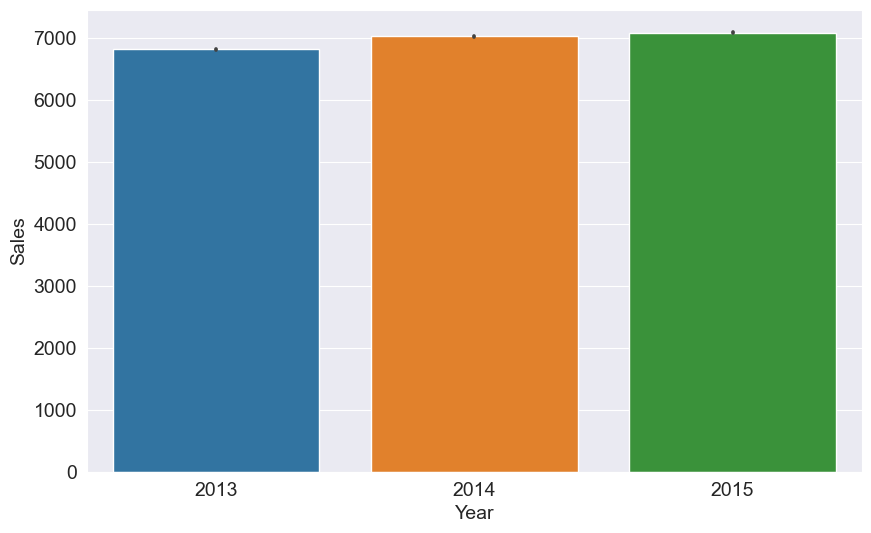

In [27]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<AxesSubplot:xlabel='Month', ylabel='Sales'>

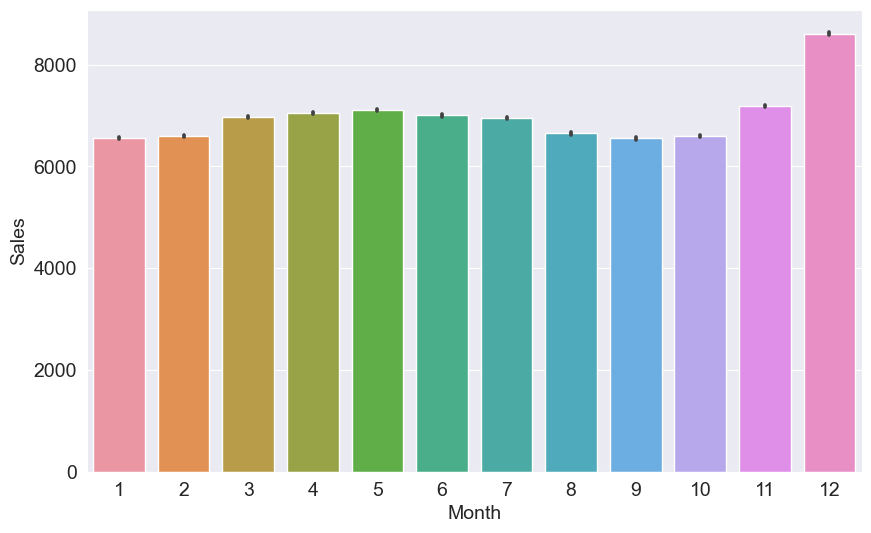

In [28]:
sns.barplot(data=merged_df, x='Month', y='Sales')

#### Competition

In [29]:
def comp_months(df):
    df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [30]:
comp_months(merged_df)
comp_months(merged_test_df)

C:\Users\91808\AppData\Local\Temp\ipykernel_8084\3444421117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = 12 * (df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth)
C:\Users\91808\AppData\Local\Temp\ipykernel_8084\3444421117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)


In [31]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(10)

Date  CompetitionDistance  CompetitionOpenSinceYear  \
577842 2014-01-30                180.0                       NaN   
685045 2013-10-25               1390.0                    2013.0   
635226 2013-12-09              44320.0                    2008.0   
906269 2013-04-10               1910.0                    2013.0   
276173 2014-11-19               1170.0                    2011.0   
173865 2015-02-26               1600.0                    2013.0   
719816 2013-09-24              11300.0                    2012.0   
323182 2014-09-30               1340.0                       NaN   
665592 2013-11-12               5650.0                    2008.0   
871892 2013-05-11               2380.0                    2010.0   

        CompetitionOpenSinceMonth  CompetitionOpen  
577842                        NaN              0.0  
685045                        8.0              2.0  
635226                        8.0             64.0  
906269                        7.0              0.0  
276173                        4.0             43.0  
173865                        8.0             18.0  
719816                        3.0             18.0  
323182                        NaN              0.0  
665592                        9.0             62.0  
871892                        3.0             38.0

#### Additional Promotion

In [32]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [33]:
promo_cols(merged_df)
promo_cols(merged_test_df)

C:\Users\91808\AppData\Local\Temp\ipykernel_8084\1197911429.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'] = 12 * (df.Year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
C:\Users\91808\AppData\Local\Temp\ipykernel_8084\1197911429.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
C:\Users\91808\AppData\Local\Temp\ipykernel_8084\1197911429.py:18: SettingWithCopyWarning:

In [34]:
merged_df[['Date', 'Promo2', 'Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval', 'Promo2Open', 'IsPromo2Month']].sample(20)

Date  Promo2  Promo2SinceYear  Promo2SinceWeek     PromoInterval  \
288427 2014-11-06       0              NaN              NaN               NaN   
869112 2013-05-13       1           2010.0             13.0   Jan,Apr,Jul,Oct   
82262  2015-05-19       1           2014.0             10.0   Jan,Apr,Jul,Oct   
623210 2013-12-20       1           2010.0              5.0   Jan,Apr,Jul,Oct   
309605 2014-10-14       1           2012.0             22.0   Feb,May,Aug,Nov   
860692 2013-05-21       0              NaN              NaN               NaN   
796508 2013-07-17       1           2011.0             40.0   Jan,Apr,Jul,Oct   
646581 2013-11-29       0              NaN              NaN               NaN   
13344  2015-07-20       1           2014.0             40.0   Jan,Apr,Jul,Oct   
424783 2014-06-16       1           2014.0             10.0  Mar,Jun,Sept,Dec   
563461 2014-02-11       0              NaN              NaN               NaN   
438758 2014-06-03       0              NaN              NaN               NaN   
251252 2014-12-16       1           2013.0             31.0   Feb,May,Aug,Nov   
120305 2015-04-15       1           2011.0             14.0   Jan,Apr,Jul,Oct   
997408 2013-01-18       0              NaN              NaN               NaN   
290553 2014-11-04       1           2012.0             40.0   Jan,Apr,Jul,Oct   
326487 2014-09-26       1           2013.0              1.0   Jan,Apr,Jul,Oct   
28544  2015-07-06       1           2009.0             45.0   Feb,May,Aug,Nov   
666929 2013-11-11       0              NaN              NaN               NaN   
243661 2014-12-24       1           2013.0             31.0   Feb,May,Aug,Nov   

        Promo2Open  IsPromo2Month  
288427    0.000000              0  
869112   37.606557              0  
82262    14.524590              0  
623210   46.557377              0  
309605   28.590164              0  
860692    0.000000              0  
796508   21.475410              1  
646581    0.000000              0  
13344     9.704918              1  
424783    3.442623              1  
563461    0.000000              0  
438758    0.000000              0  
251252   16.590164              0  
120305   48.459016              1  
997408    0.000000              0  
290553   25.147541              0  
326487   20.721311              0  
28544    68.098361              0  
666929    0.000000              0  
243661   16.819672              0

### Train/Test/Validation Split

In [35]:
len(merged_df)

844338

In [36]:
train_size = int(.75 * len(merged_df))
train_size

633253

In [37]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [38]:
len(train_df), len(val_df)

(633253, 211085)

In [39]:
train_df.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017190   1097          2 2013-01-01   5961       1405     1      0   
1016179     85          2 2013-01-01   4220        619     1      0   
1016353    259          2 2013-01-01   6851       1444     1      0   
1016356    262          2 2013-01-01  17267       2875     1      0   
1016368    274          2 2013-01-01   3102        729     1      0   

        StateHoliday  SchoolHoliday StoreType  ... Promo2SinceWeek  \
1017190            a              1         b  ...             NaN   
1016179            a              1         b  ...             NaN   
1016353            a              1         b  ...             NaN   
1016356            a              1         b  ...             NaN   
1016368            a              1         b  ...            10.0   

         Promo2SinceYear    PromoInterval  Day  Month  Year  WeekOfYear  \
1017190              NaN              NaN    1      1  2013           1   
1016179              NaN              NaN    1      1  2013           1   
1016353              NaN              NaN    1      1  2013           1   
1016356              NaN              NaN    1      1  2013           1   
1016368           2013.0  Jan,Apr,Jul,Oct    1      1  2013           1   

        CompetitionOpen  Promo2Open  IsPromo2Month  
1017190           130.0         0.0              0  
1016179            15.0         0.0              0  
1016353             0.0         0.0              0  
1016356             0.0         0.0              0  
1016368             0.0         0.0              0  

[5 rows x 25 columns]

In [40]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-11 00:00:00'))

In [41]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-11 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [42]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [43]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

### Input and Target columns

>Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [44]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']

In [45]:
target_col = 'Sales'

In [46]:
merged_df[input_cols].nunique()

Store                  1115
DayOfWeek                 7
Promo                     2
StateHoliday              4
SchoolHoliday             2
StoreType                 4
Assortment                3
CompetitionDistance     654
CompetitionOpen         336
Day                      31
Month                    12
Year                      3
WeekOfYear               52
Promo2                    2
Promo2Open              566
IsPromo2Month             2
dtype: int64

In [47]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [48]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [49]:
test_inputs = merged_test_df[input_cols].copy()

In [50]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day', 'Month', 'Year', 'WeekOfYear',  ] # Not considering Store as cat colums as it will create error in lenear models
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

In [51]:
train_inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    1628
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day                       0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

Seems like competition distance is the only missing value, and we can simply fill it with the highest value (to indicate that competition is very far away).

In [52]:
max_distance = merged_df.CompetitionDistance.max()
train_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
val_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance, inplace=True)

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler().fit(train_inputs[numeric_cols])

In [55]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [58]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [59]:
# Slecting juts the columns needed
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Creating Baseline Models

##### Fixed/Random Guess

In [181]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [182]:
train_preds = return_mean(X_train)

In [183]:
train_preds

array([6955.95913366, 6955.95913366, 6955.95913366, ..., 6955.95913366,
       6955.95913366, 6955.95913366])

In [66]:
from sklearn.metrics import mean_squared_error

In [185]:
mean_squared_error(train_preds, train_targets, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3081.936514603596

In [186]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


3168.5387887049756

### Baseline ML model

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
linreg = LinearRegression()

In [72]:
linreg.fit(X_train, train_targets)

LinearRegression()

In [73]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7654., 10642.,  7514., ...,  5770.,  6968.,  5766.])

In [74]:
mean_squared_error(train_preds, train_targets, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2715.014801627764

In [75]:
val_preds = linreg.predict(X_val)
val_preds


array([6218., 6424., 6218., ..., 7530., 8326., 7840.])

In [76]:
mean_squared_error(val_preds, val_targets, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


2804.557506937806

### Picking strategies, training models & tuning hyperparameters

In [63]:
# Definig a function wich takes the model and retuns the loss
def try_model(model):
    # Fit the model
    model.fit(X_train, train_targets)
    
    # Generate predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    # Compute RMSE
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse

In [195]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [196]:
try_model(LinearRegression())

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2715.014801627764, 2804.557506937806)

In [197]:
try_model(Ridge())

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2707.7432507181243, 2793.0582856711717)

In [198]:
try_model(Lasso())

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2707.996488345942, 2793.2357520559067)

In [199]:
try_model(ElasticNet())

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2901.862267459536, 2993.7472439505573)

In [200]:
try_model(SGDRegressor())

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2708.0449818303664, 2792.1156644327193)

### Tree Based Models

In [201]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [202]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(0.0, 2014.3476790776485)

In [203]:
from sklearn.ensemble import RandomForestRegressor

In [204]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1,max_depth=10)
try_model(rf)

Wall time: 1min 32s


C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(2162.744997401316, 2342.002562698719)

In [210]:
%%time
rf = RandomForestRegressor(n_estimators=400,random_state=42, n_jobs=-1,max_depth=12)
try_model(rf)

Wall time: 14min 3s


C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(1627.98010758498, 1973.573628254534)

In [211]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

feature  importance
3   CompetitionDistance    0.227818
1                 Promo    0.204998
0                 Store    0.202032
4       CompetitionOpen    0.056248
12          DayOfWeek_1    0.046317
11           WeekOfYear    0.036585
24          StoreType_b    0.036526
6            Promo2Open    0.033312
5                Promo2    0.023323
8                   Day    0.023244

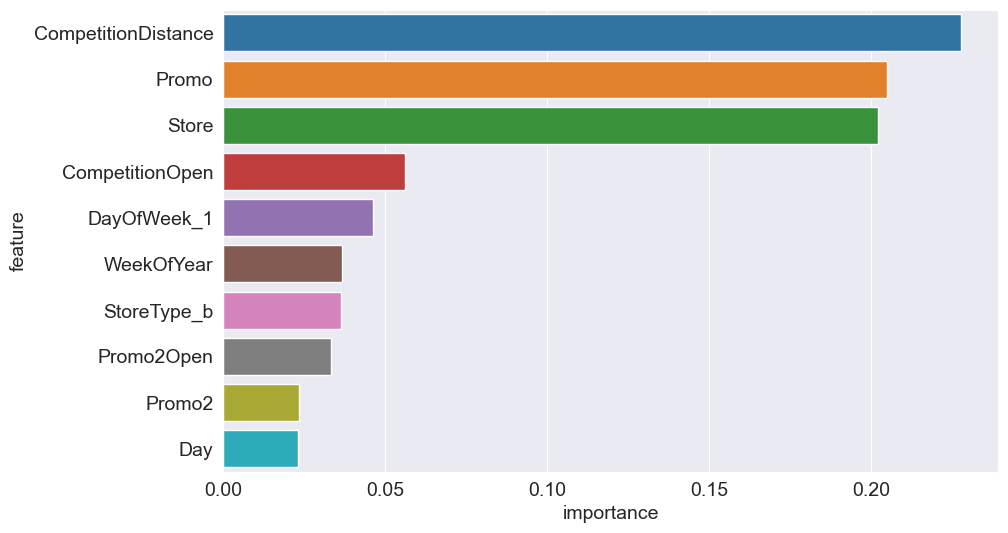

In [212]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Gradient Boosting

In [60]:
!pip install xgboost
from xgboost import XGBRegressor

In [84]:
%%time
GB = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)
try_model(GB)

Wall time: 3min 30s


C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(339.94437595841777, 1322.8188115648782)

## Training Whole dataset on Gradient Boosting for submission

In [107]:
inputs=pd.concat([X_train, X_val])
targets=pd.concat([train_targets, val_targets])


In [108]:
GB.fit(inputs,targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [111]:
predicted=GB.predict(inputs)

In [112]:
mean_squared_error(targets, predicted, squared=False)

C:\Users\91808\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


377.91003033124747

In [122]:
test_preds=GB.predict(X_test)
len(predicted)

41088

In [123]:
submission_df=pd.read_csv("rossmann-store-sales/sample_submission.csv", low_memory=False)

In [124]:
submission_df['Sales']  = test_preds

In [126]:
submission_df['Sales']=submission_df['Sales'] * test_df.Open.fillna(1.)

In [127]:
submission_df.to_csv('submission.csv', index=None)

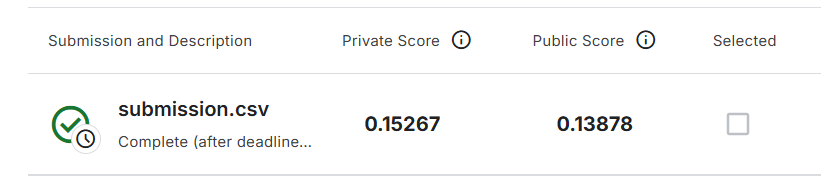

In [129]:
from IPython.display import Image, display

display(Image(filename="Screenshot 2024-11-11 025252.png"))
